## Proyecto 3. Entrega 1
### Analsisis Exploratorio
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 223305 - Esteban Zambrano 22119

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Analisis Natalidad

##### Función para clasificar tipo de variable

In [3]:
path = "./data/nat"
files = os.listdir(path)
print("Archivos en la carpeta:", files)

dfs = {file[:-4]: pd.read_csv(os.path.join(path, file)) for file in files if file.endswith(".csv")}

Archivos en la carpeta: ['NatDepEC.csv', 'NatDepMes.csv', 'NatEdad.csv', 'NatEdadEC.csv', 'NatEscolaridad.csv', 'NatEtniaArea.csv', 'NatNum.csv', 'NatOcup.csv']


In [11]:
def clasificar_variable(tipo, nombre_columna):
    nombre_columna = nombre_columna.strip().lower()
    if nombre_columna in ['anio', 'mes']:
        return 'Cualitativa'
    elif tipo in ['object', 'category']:
        return 'Cualitativa'
    elif tipo in ['int64', 'float64']:
        return 'Cuantitativa'
    else:
        return 'Otro'

for archivo in files:
    if archivo.endswith(".csv"):
        print(f"=== Procesando: {archivo} ===")
        try:
            df = pd.read_csv(os.path.join(path, archivo))

            tipos = df.dtypes
            clasificados = pd.Series(
                [clasificar_variable(tipos[col], col) for col in tipos.index],
                index=tipos.index
            )

            n_cual = sum(clasificados == "Cualitativa")
            n_cuant = sum(clasificados == "Cuantitativa")
            n_duplicados = df.duplicated().sum()
            n_nulos = df.isnull().sum().sum()

            print(f"Observaciones: {df.shape[0]}, Variables: {df.shape[1]}")
            print(f"Cualitativas: {n_cual}, Cuantitativas: {n_cuant}")
            print(f"Valores nulos totales: {n_nulos}")
            print(f"Duplicados: {n_duplicados}")
            print("-" * 60)

        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")
            print("-" * 60)

=== Procesando: NatDepEC.csv ===
Observaciones: 325, Variables: 7
Cualitativas: 2, Cuantitativas: 5
Valores nulos totales: 0
Duplicados: 0
------------------------------------------------------------
=== Procesando: NatDepMes.csv ===
Observaciones: 4225, Variables: 6
Cualitativas: 3, Cuantitativas: 3
Valores nulos totales: 0
Duplicados: 0
------------------------------------------------------------
=== Procesando: NatEdad.csv ===
Observaciones: 668, Variables: 27
Cualitativas: 2, Cuantitativas: 25
Valores nulos totales: 0
Duplicados: 0
------------------------------------------------------------
=== Procesando: NatEdadEC.csv ===
Observaciones: 286, Variables: 8
Cualitativas: 3, Cuantitativas: 5
Valores nulos totales: 0
Duplicados: 0
------------------------------------------------------------
=== Procesando: NatEscolaridad.csv ===
Observaciones: 232, Variables: 12
Cualitativas: 2, Cuantitativas: 10
Valores nulos totales: 349
Duplicados: 0
-----------------------------------------------

##### Iterar y mostrar información de cada dataset

In [12]:
for archivo in os.listdir(path):
    if archivo.endswith(".csv"):
        nombre = archivo.replace(".csv", "")
        df = pd.read_csv(os.path.join(path, archivo))

        tipos = df.dtypes
        clasificados = pd.Series(
            [clasificar_variable(tipos[col], col) for col in tipos.index],
            index=tipos.index
        )

        n_cualitativas = sum(clasificados == "Cualitativa")
        n_cuantitativas = sum(clasificados == "Cuantitativa")
        n_otros = sum(clasificados == "Otro")
        n_duplicados = df.duplicated().sum()
        nulos_por_col = df.isnull().sum()

        print(f"Dataset: {nombre}")
        print(f"Filas (observaciones): {df.shape[0]}")
        print(f"Variables: {df.shape[1]} (Cualitativas: {n_cualitativas}, Cuantitativas: {n_cuantitativas}, Otros: {n_otros})")
        print(f"Tipos por variable:")
        print(clasificados)
        print(f"Valores nulos por columna:")
        print(nulos_por_col[nulos_por_col > 0] if nulos_por_col.sum() > 0 else "No hay valores nulos")
        print(f"Filas duplicadas: {n_duplicados}")
        print("-" * 60)

Dataset: NatDepEC
Filas (observaciones): 325
Variables: 7 (Cualitativas: 2, Cuantitativas: 5, Otros: 0)
Tipos por variable:
Departamento de residencia     Cualitativa
Total                         Cuantitativa
Soltera                       Cuantitativa
Casada                        Cuantitativa
Unida                         Cuantitativa
Ignorado                      Cuantitativa
Anio                           Cualitativa
dtype: object
Valores nulos por columna:
No hay valores nulos
Filas duplicadas: 0
------------------------------------------------------------
Dataset: NatDepMes
Filas (observaciones): 4225
Variables: 6 (Cualitativas: 3, Cuantitativas: 3, Otros: 0)
Tipos por variable:
Mes                            Cualitativa
Departamento de residencia     Cualitativa
Total                         Cuantitativa
Hombres                       Cuantitativa
Mujeres                       Cuantitativa
Anio                           Cualitativa
dtype: object
Valores nulos por columna:
No hay 

#### Analisis de Normalidad

********************************************************************************************

🔹 **Analizando archivo: NatDepEC**

Estadístico de prueba (ks_statistic) = 0.21390544249239829000
p-value = 0.00000000000052275624
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Total' NO provienen de una distribución normal.



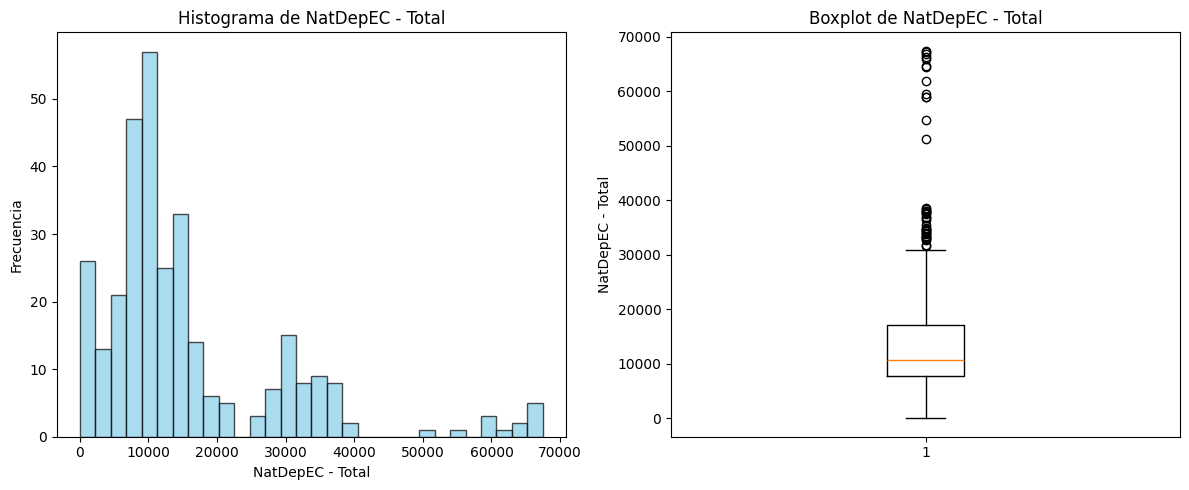

Estadístico de prueba (ks_statistic) = 0.24535797019600008584
p-value = 0.00000000000000005021
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Soltera' NO provienen de una distribución normal.



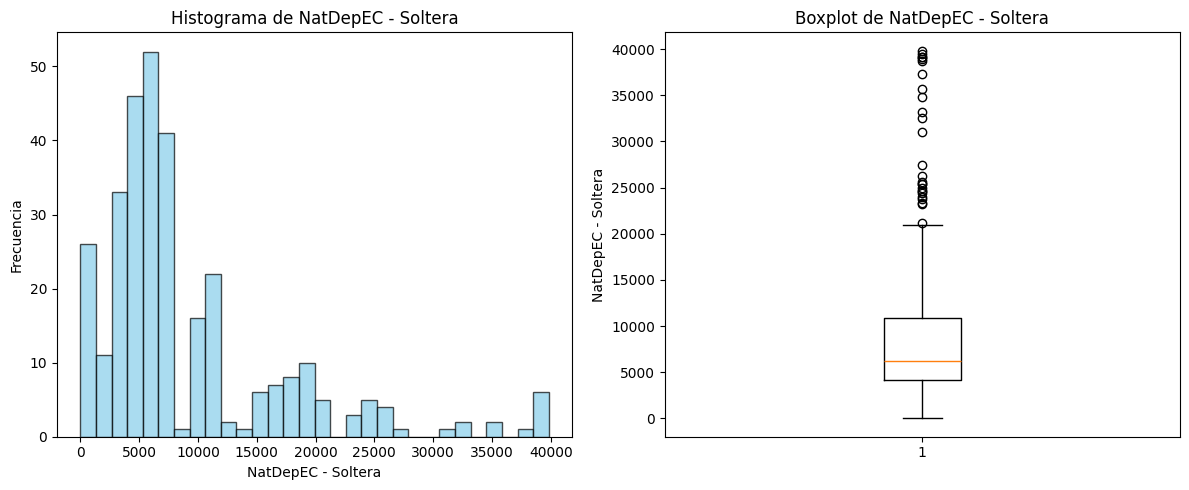

⚠️ La columna 'Casada' tiene 7 ceros en el archivo 'NatDepEC'.
Estadístico de prueba (ks_statistic) = 0.18945488269628329991
p-value = 0.00000000046399702704
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Casada' NO provienen de una distribución normal.



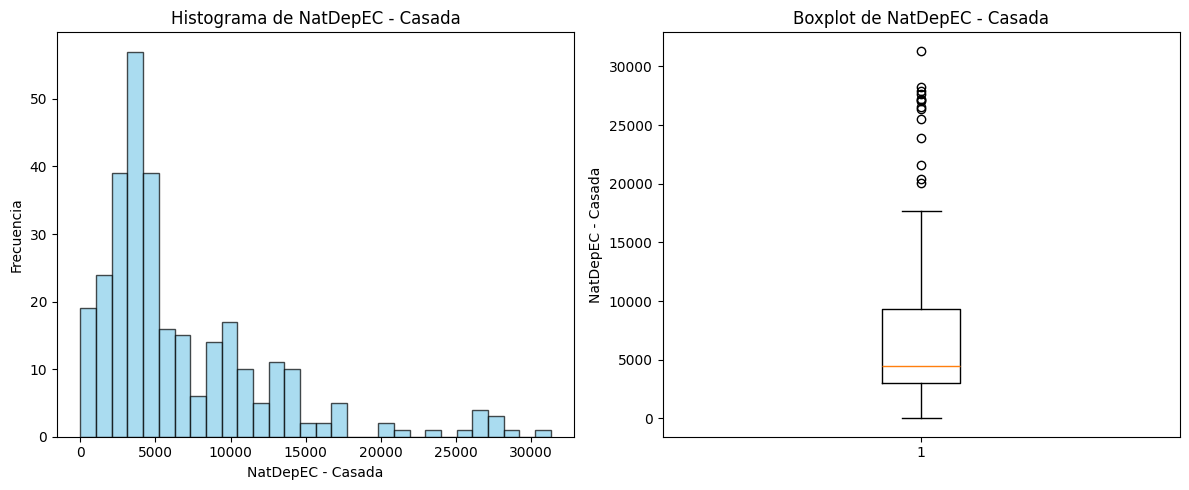

⚠️ La columna 'Unida' tiene 47 ceros en el archivo 'NatDepEC'.
Estadístico de prueba (ks_statistic) = 0.34137161270980681538
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Unida' NO provienen de una distribución normal.



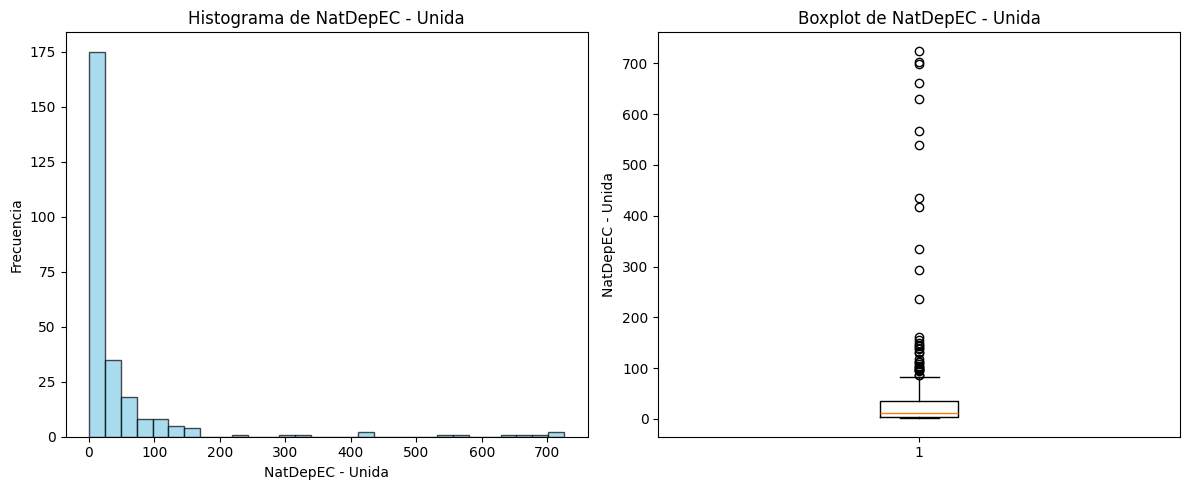

⚠️ La columna 'Ignorado' tiene 36 ceros en el archivo 'NatDepEC'.
Estadístico de prueba (ks_statistic) = 0.29662852983845422461
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Ignorado' NO provienen de una distribución normal.



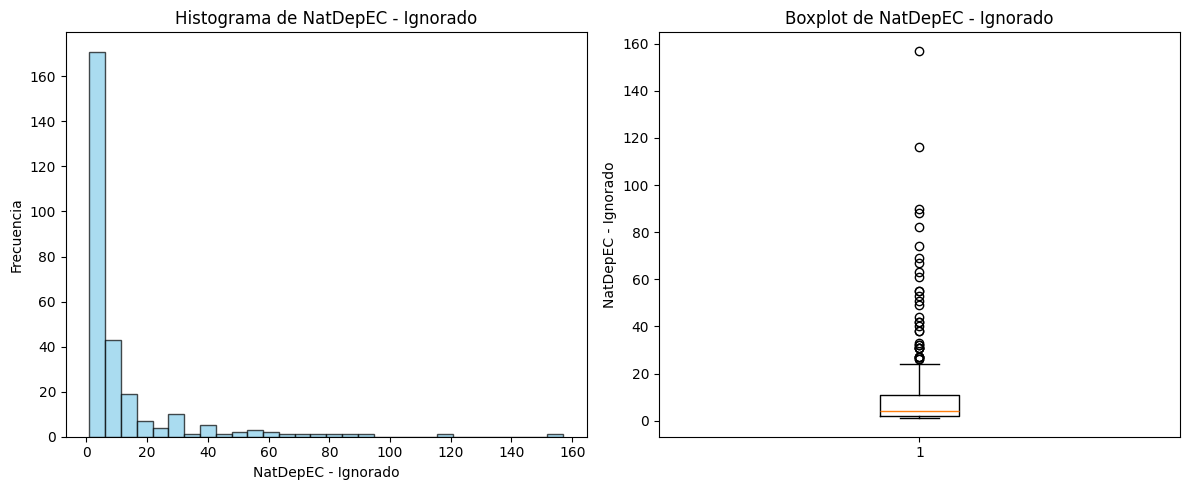

********************************************************************************************

🔹 **Analizando archivo: NatDepMes**

⚠️ La columna 'Total' tiene 4 ceros en el archivo 'NatDepMes'.
Estadístico de prueba (ks_statistic) = 0.20063799344953092696
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepMes - Total' NO provienen de una distribución normal.



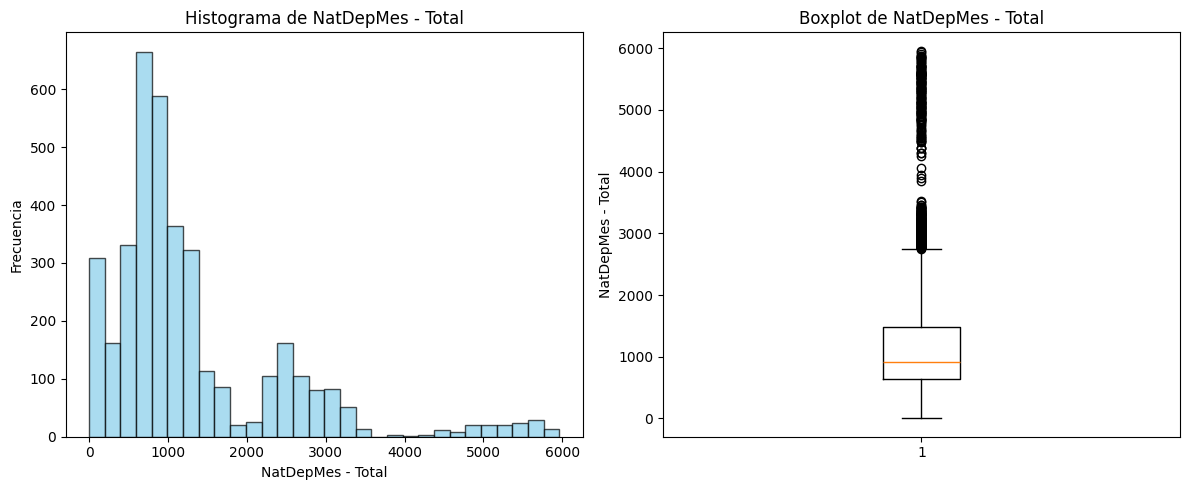

⚠️ La columna 'Hombres' tiene 20 ceros en el archivo 'NatDepMes'.
Estadístico de prueba (ks_statistic) = 0.19981474079006134037
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepMes - Hombres' NO provienen de una distribución normal.



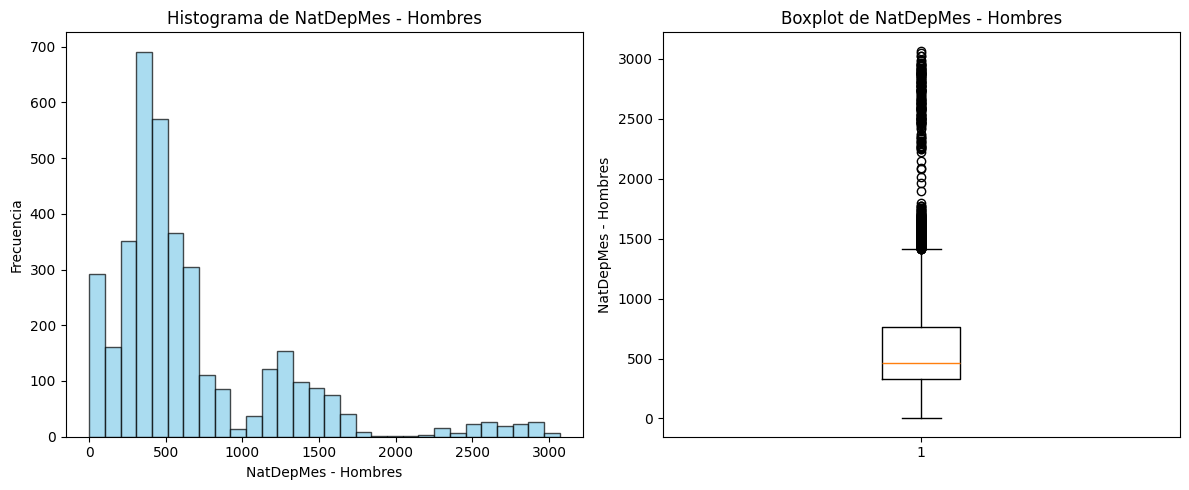

⚠️ La columna 'Mujeres' tiene 18 ceros en el archivo 'NatDepMes'.
Estadístico de prueba (ks_statistic) = 0.19889093408591296264
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepMes - Mujeres' NO provienen de una distribución normal.



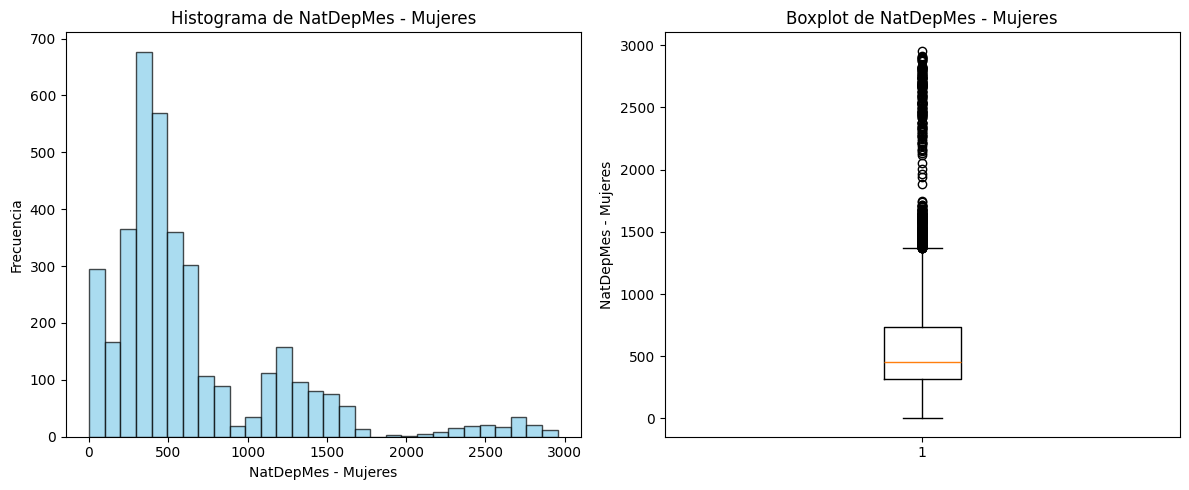

********************************************************************************************

🔹 **Analizando archivo: NatEdad**

Estadístico de prueba (ks_statistic) = 0.19937147327842347222
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEdad - Total' NO provienen de una distribución normal.



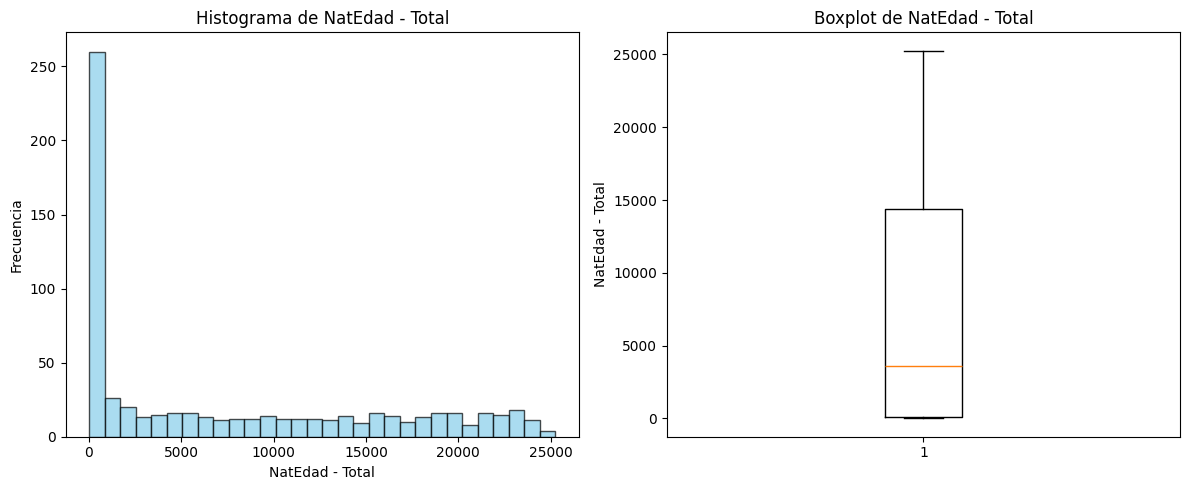

⚠️ La columna 'Guatemala' tiene 82 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.17495758131312416639
p-value = 0.00000000000000082382
Se rechaza la hipótesis nula: los datos de 'NatEdad - Guatemala' NO provienen de una distribución normal.



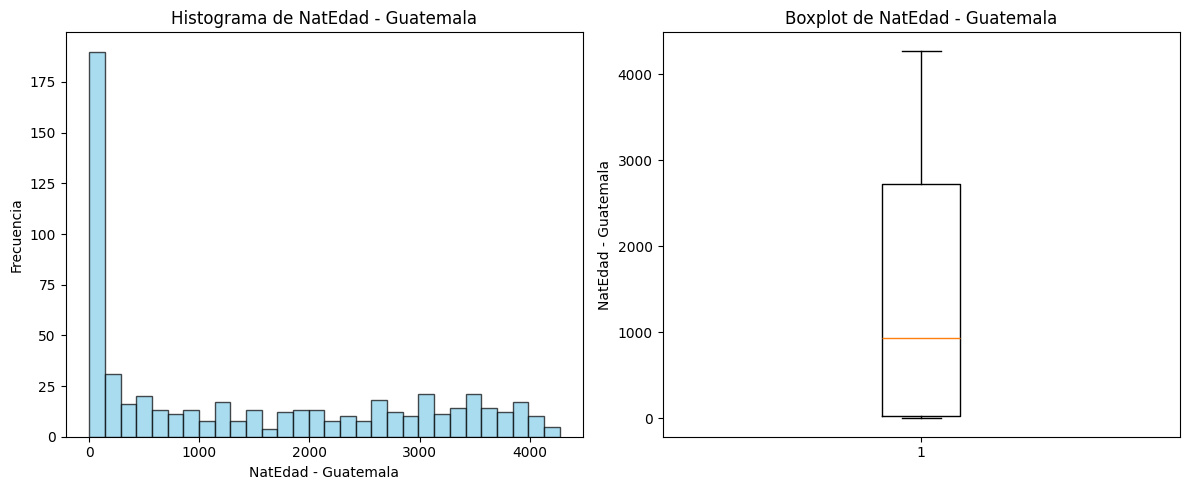

⚠️ La columna 'El Progreso' tiene 181 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.12389456335089649164
p-value = 0.00000084437754237621
Se rechaza la hipótesis nula: los datos de 'NatEdad - El Progreso' NO provienen de una distribución normal.



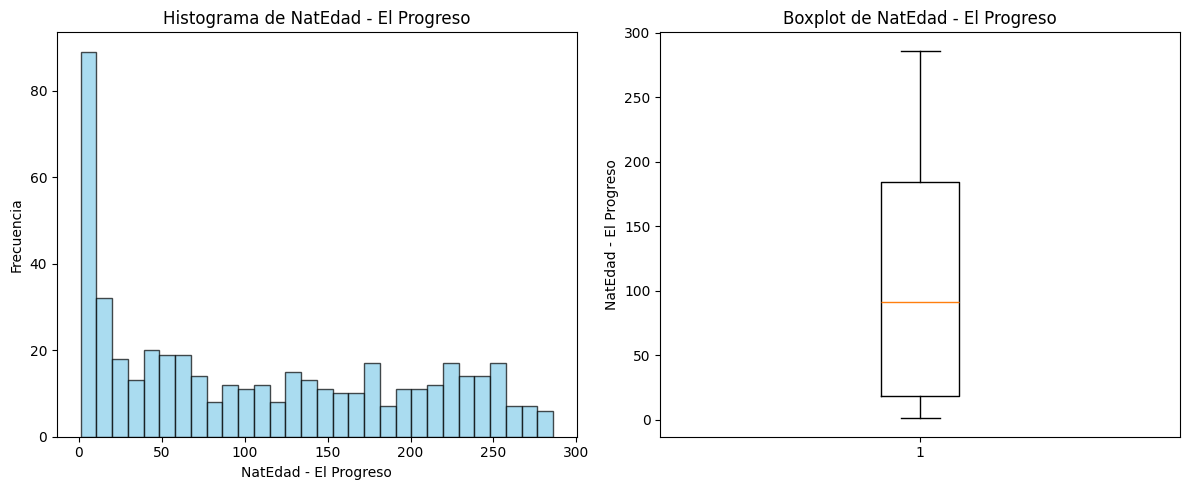

⚠️ La columna 'Sacatepéquez' tiene 177 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13392308687479492768
p-value = 0.00000006152615949316
Se rechaza la hipótesis nula: los datos de 'NatEdad - Sacatepéquez' NO provienen de una distribución normal.



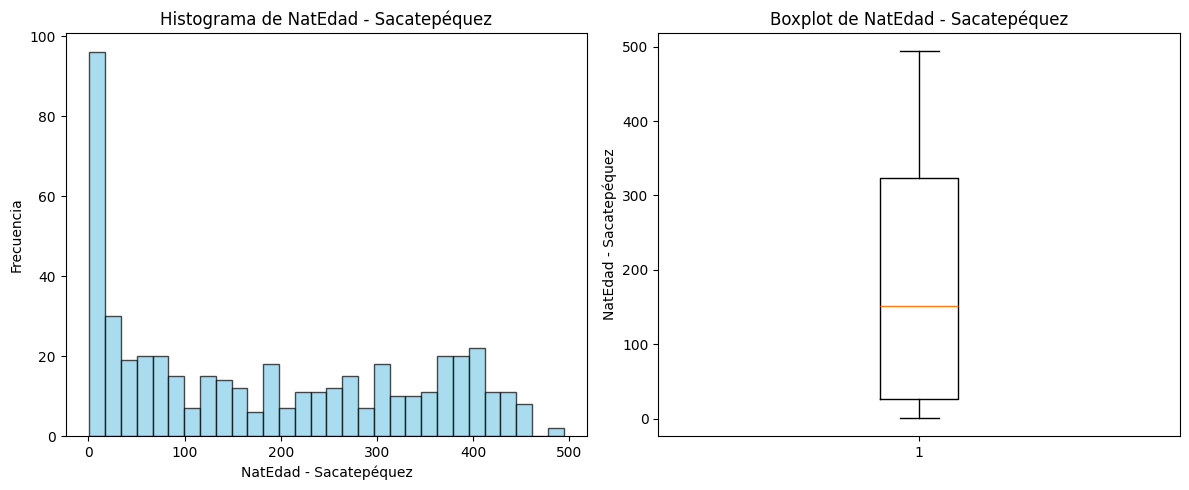

⚠️ La columna 'Chimaltenango' tiene 141 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13334903733898595402
p-value = 0.00000001973174648721
Se rechaza la hipótesis nula: los datos de 'NatEdad - Chimaltenango' NO provienen de una distribución normal.



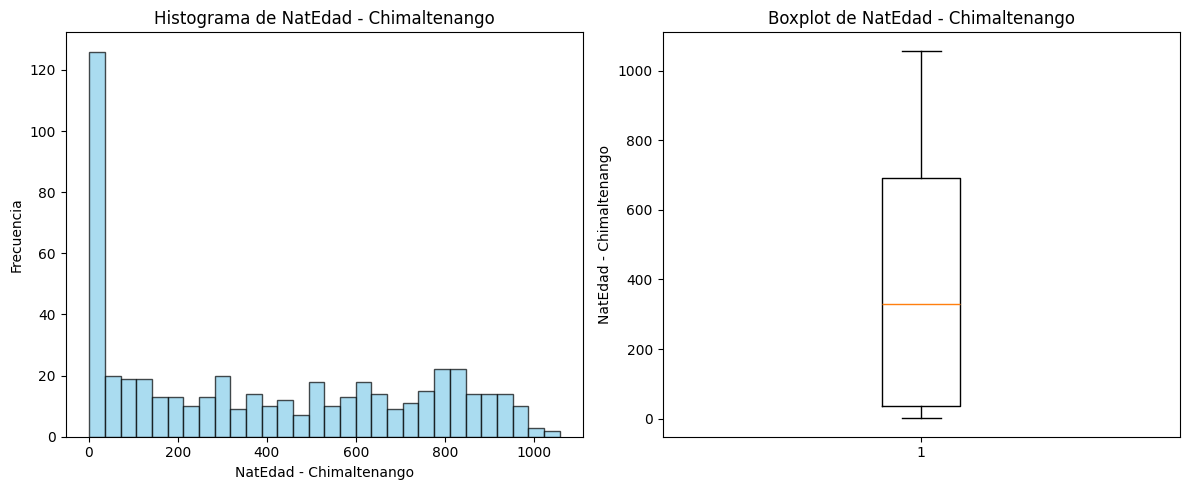

⚠️ La columna 'Escuintla' tiene 127 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.16041930213299043784
p-value = 0.00000000000244715424
Se rechaza la hipótesis nula: los datos de 'NatEdad - Escuintla' NO provienen de una distribución normal.



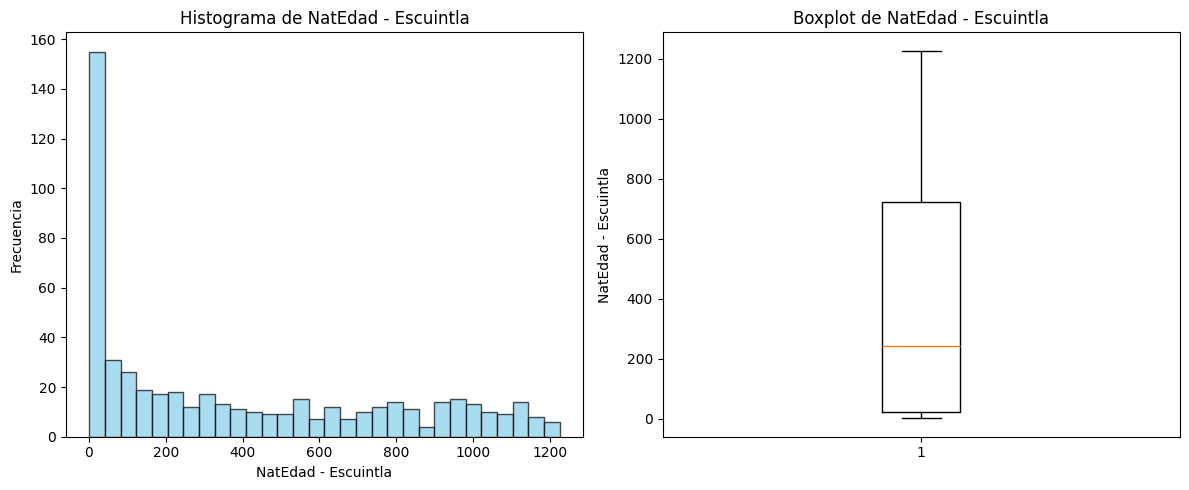

⚠️ La columna 'Santa Rosa' tiene 149 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13292909310298983705
p-value = 0.00000002943480333741
Se rechaza la hipótesis nula: los datos de 'NatEdad - Santa Rosa' NO provienen de una distribución normal.



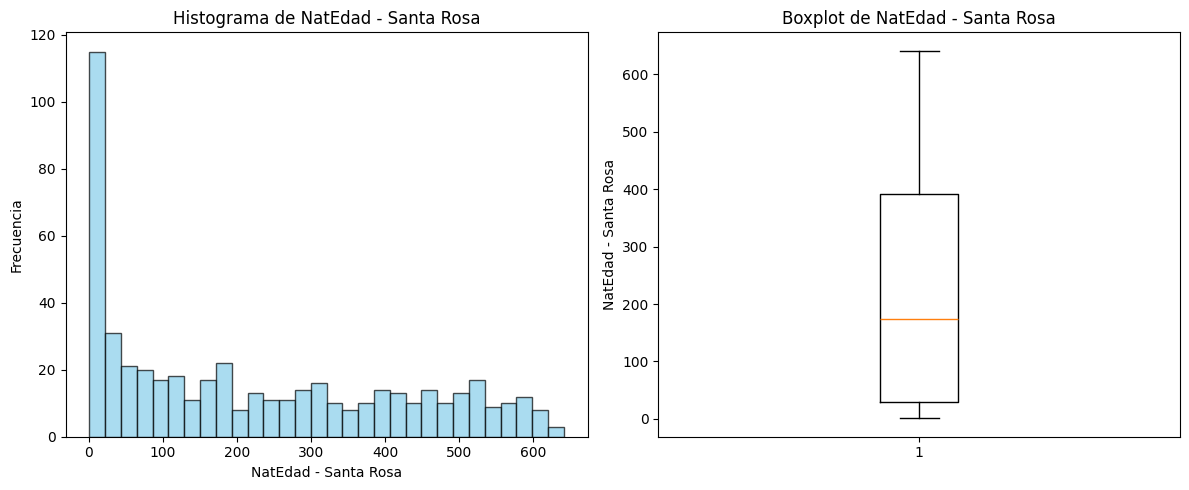

⚠️ La columna 'Sololá' tiene 126 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13817270419850946617
p-value = 0.00000000284836340096
Se rechaza la hipótesis nula: los datos de 'NatEdad - Sololá' NO provienen de una distribución normal.



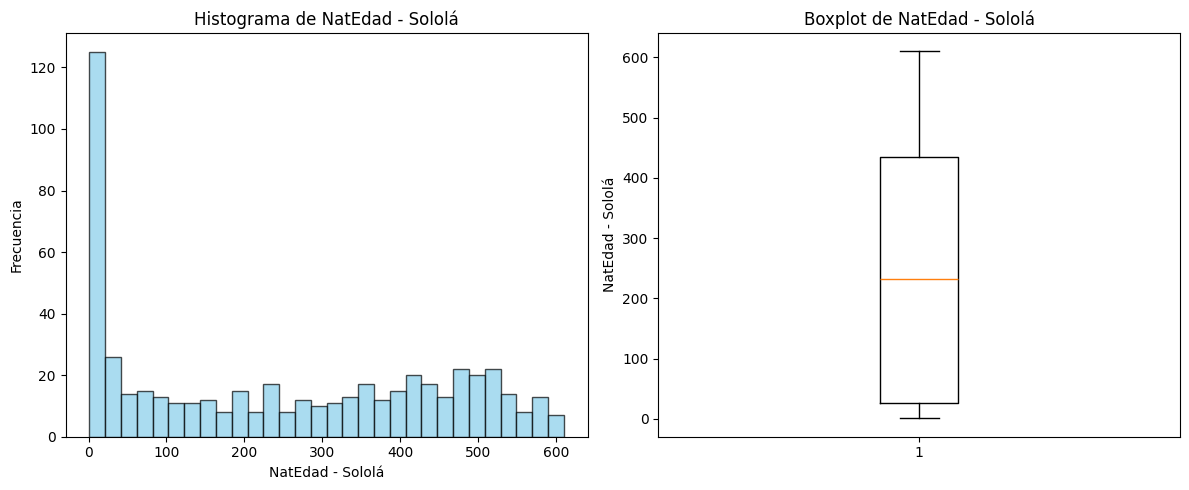

⚠️ La columna 'Totonicapán' tiene 107 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13687132106959437605
p-value = 0.00000000204320174963
Se rechaza la hipótesis nula: los datos de 'NatEdad - Totonicapán' NO provienen de una distribución normal.



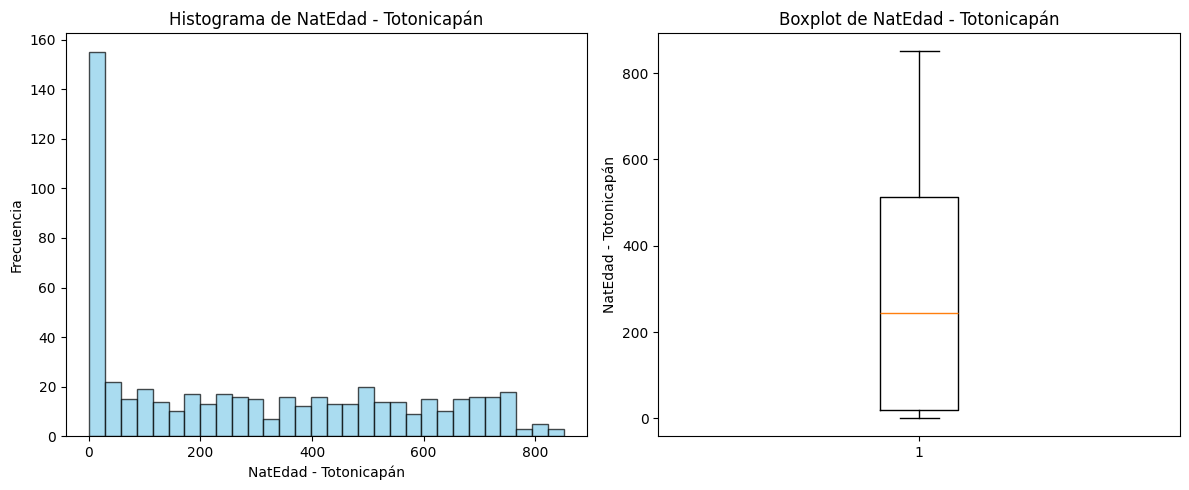

⚠️ La columna 'Quetzaltenango' tiene 104 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15011434771556003698
p-value = 0.00000000002643941350
Se rechaza la hipótesis nula: los datos de 'NatEdad - Quetzaltenango' NO provienen de una distribución normal.



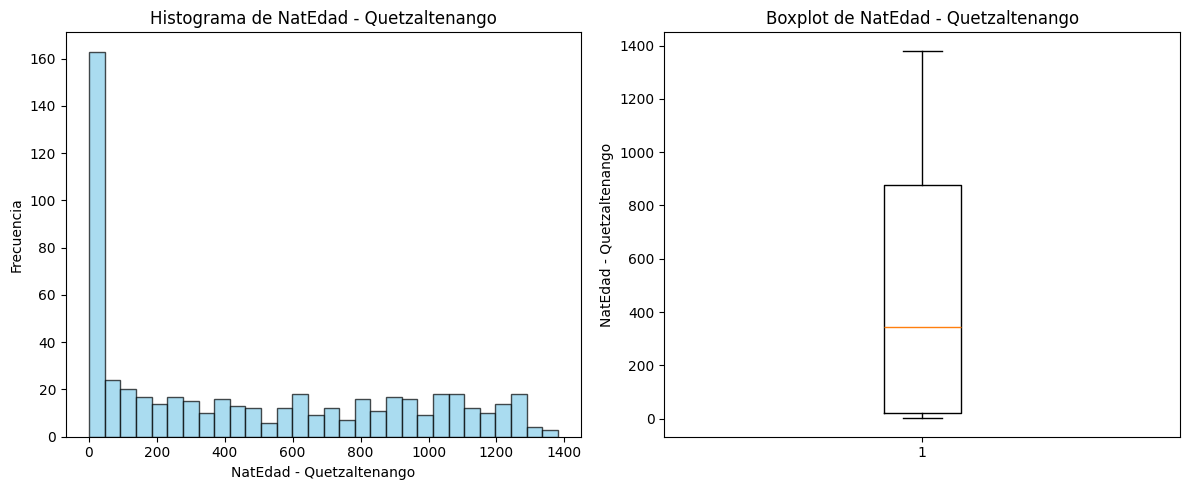

⚠️ La columna 'Suchitepéquez' tiene 128 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.14712232717114154257
p-value = 0.00000000020242072925
Se rechaza la hipótesis nula: los datos de 'NatEdad - Suchitepéquez' NO provienen de una distribución normal.



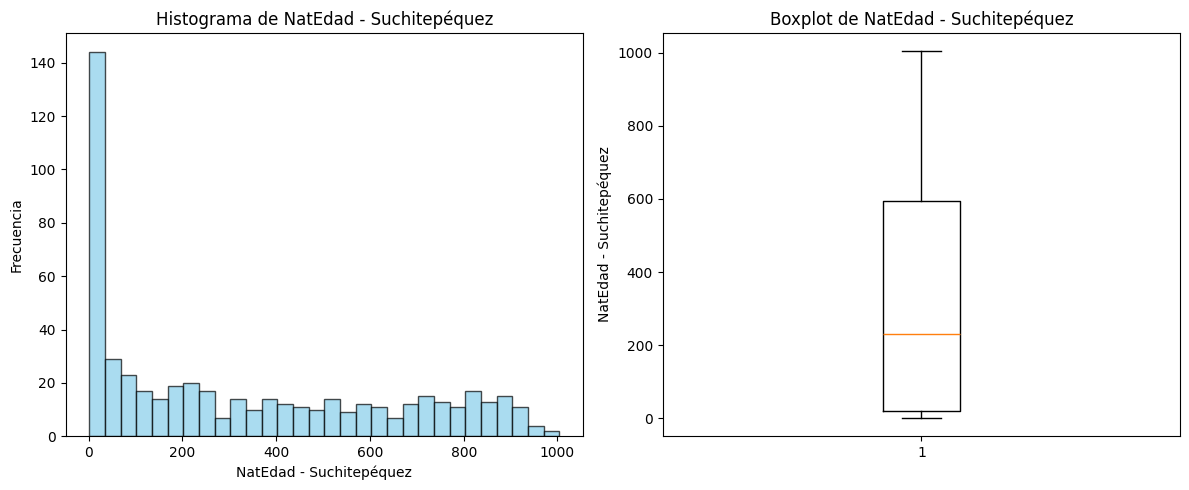

⚠️ La columna 'Retalhuleu' tiene 151 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13912262019372406696
p-value = 0.00000000568072365204
Se rechaza la hipótesis nula: los datos de 'NatEdad - Retalhuleu' NO provienen de una distribución normal.



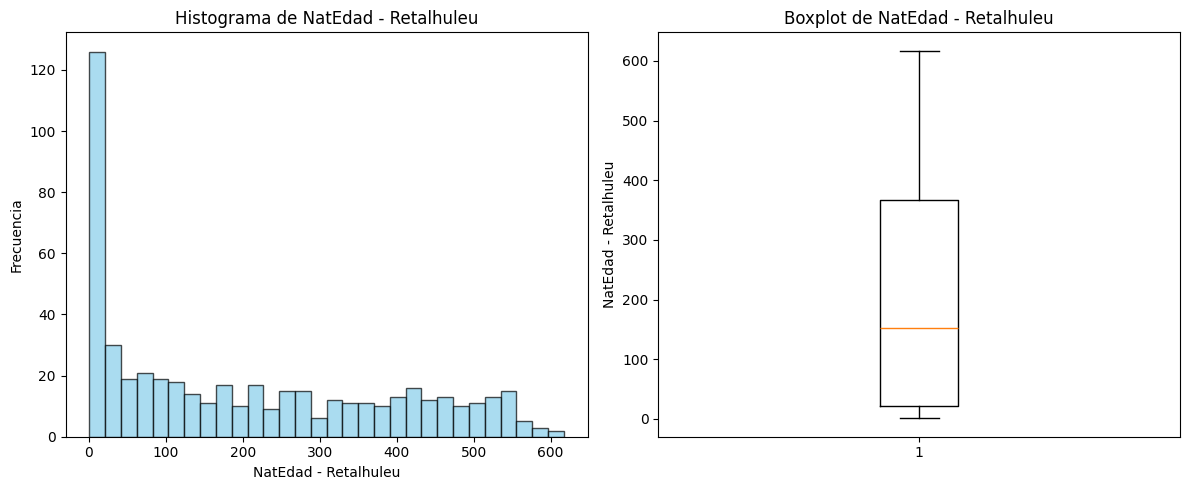

⚠️ La columna 'San Marcos' tiene 56 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.16744375121199944756
p-value = 0.00000000000000378371
Se rechaza la hipótesis nula: los datos de 'NatEdad - San Marcos' NO provienen de una distribución normal.



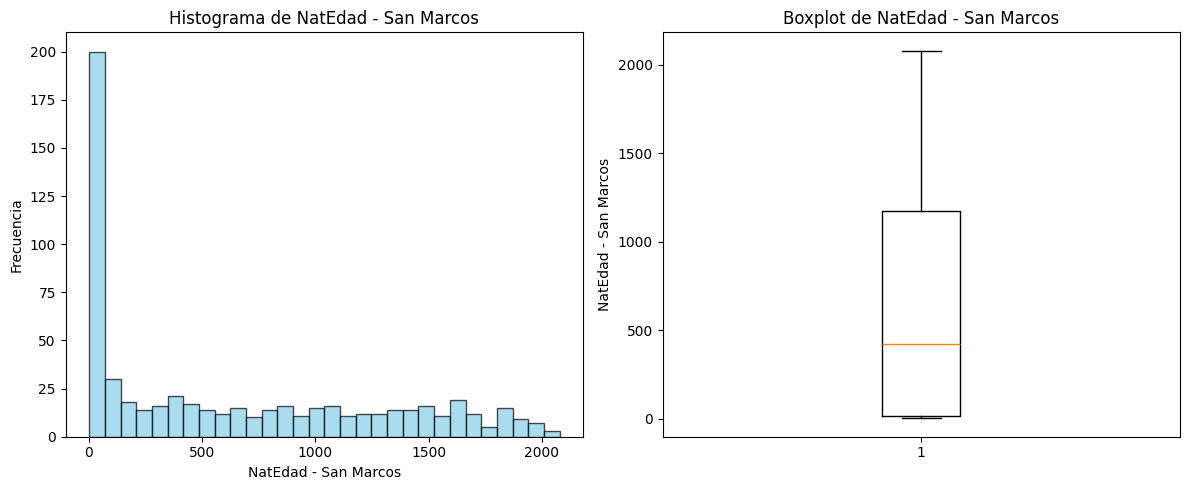

⚠️ La columna 'Huehuetenango' tiene 52 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.17336822086490949468
p-value = 0.00000000000000025528
Se rechaza la hipótesis nula: los datos de 'NatEdad - Huehuetenango' NO provienen de una distribución normal.



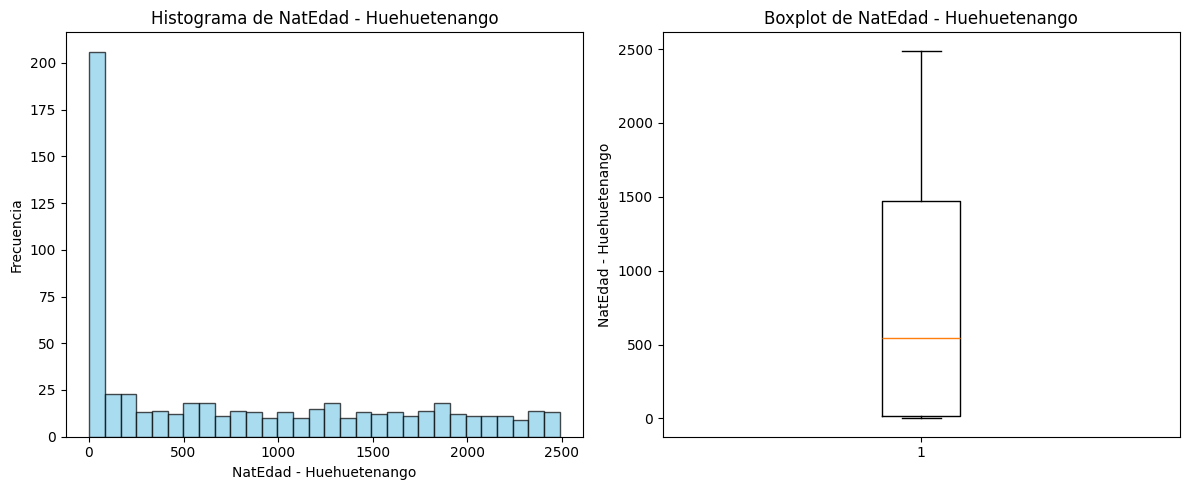

⚠️ La columna 'Quiché' tiene 66 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.16441114520454391812
p-value = 0.00000000000002213082
Se rechaza la hipótesis nula: los datos de 'NatEdad - Quiché' NO provienen de una distribución normal.



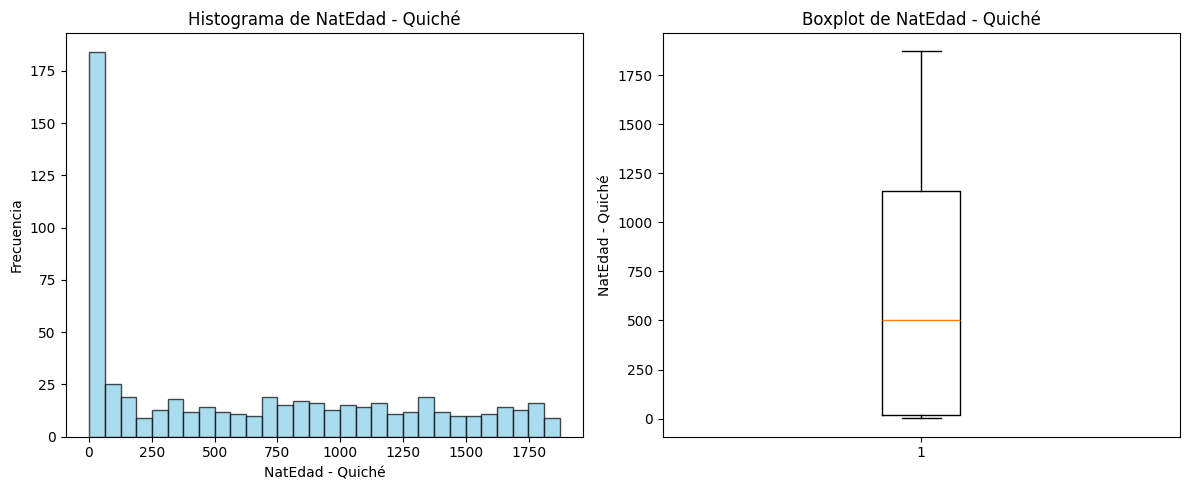

⚠️ La columna 'Baja Verapaz' tiene 141 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.12888945499791365501
p-value = 0.00000006643714230056
Se rechaza la hipótesis nula: los datos de 'NatEdad - Baja Verapaz' NO provienen de una distribución normal.



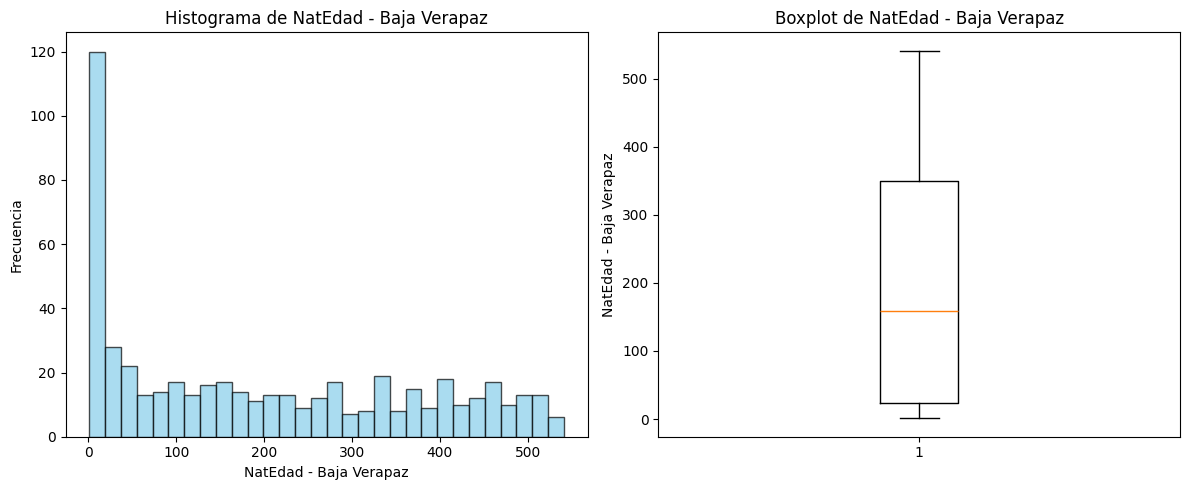

⚠️ La columna 'Alta Verapaz' tiene 79 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15797682016516267911
p-value = 0.00000000000050540084
Se rechaza la hipótesis nula: los datos de 'NatEdad - Alta Verapaz' NO provienen de una distribución normal.



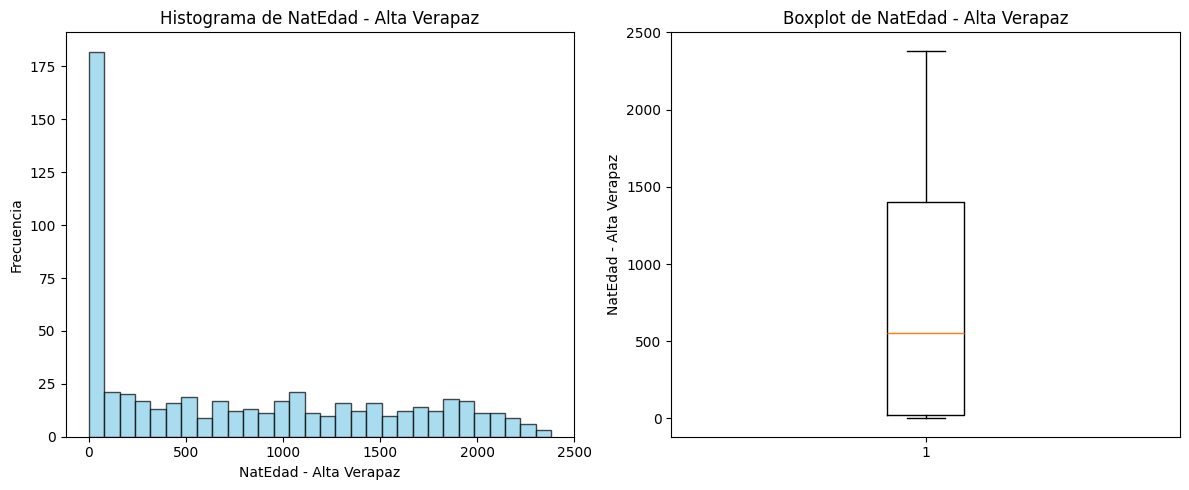

⚠️ La columna 'Petén' tiene 75 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15854513473219472575
p-value = 0.00000000000033470000
Se rechaza la hipótesis nula: los datos de 'NatEdad - Petén' NO provienen de una distribución normal.



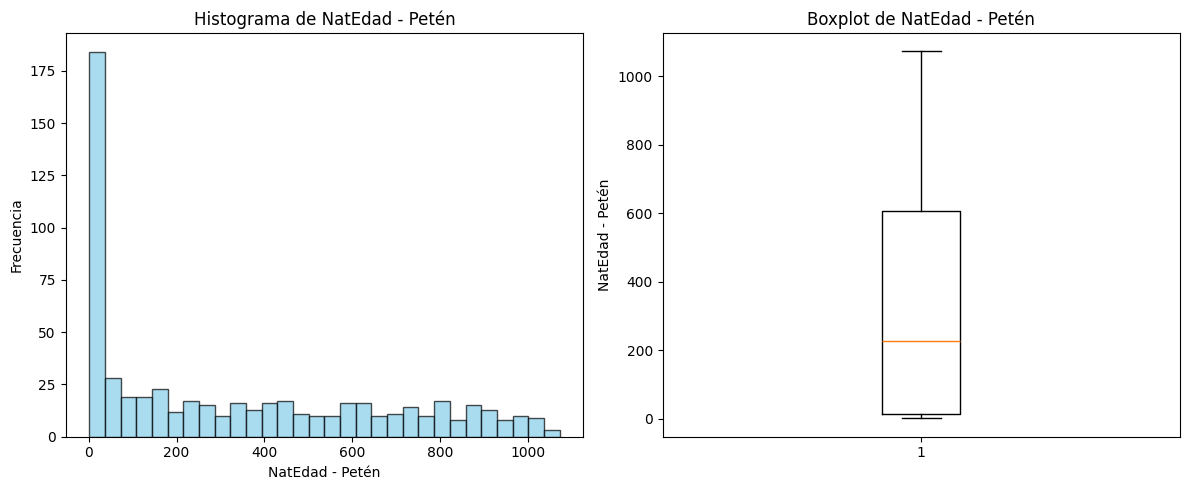

⚠️ La columna 'Izabal' tiene 116 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15012673521700670154
p-value = 0.00000000004534791787
Se rechaza la hipótesis nula: los datos de 'NatEdad - Izabal' NO provienen de una distribución normal.



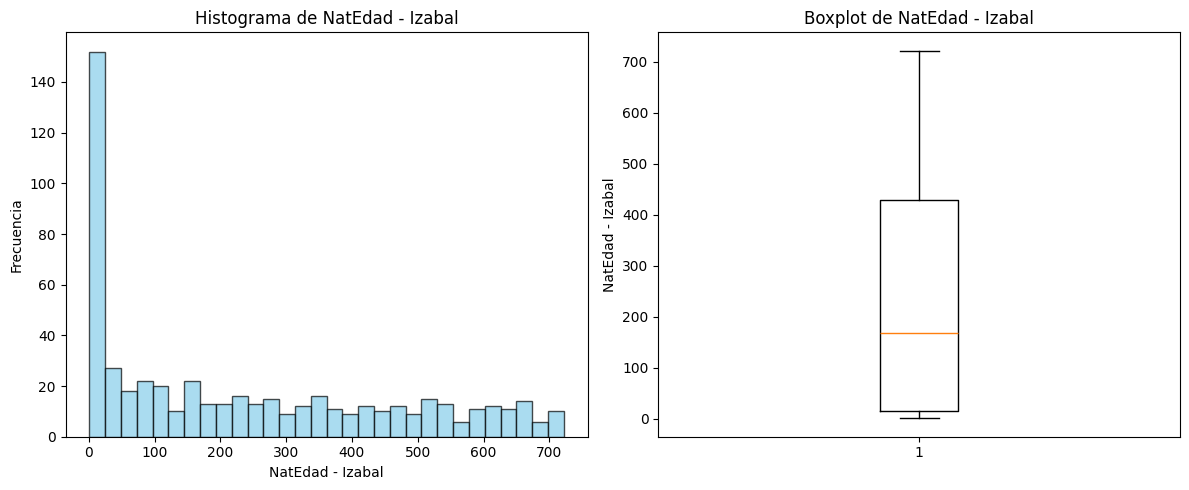

⚠️ La columna 'Zacapa' tiene 135 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13867135592003076994
p-value = 0.00000000347912348766
Se rechaza la hipótesis nula: los datos de 'NatEdad - Zacapa' NO provienen de una distribución normal.



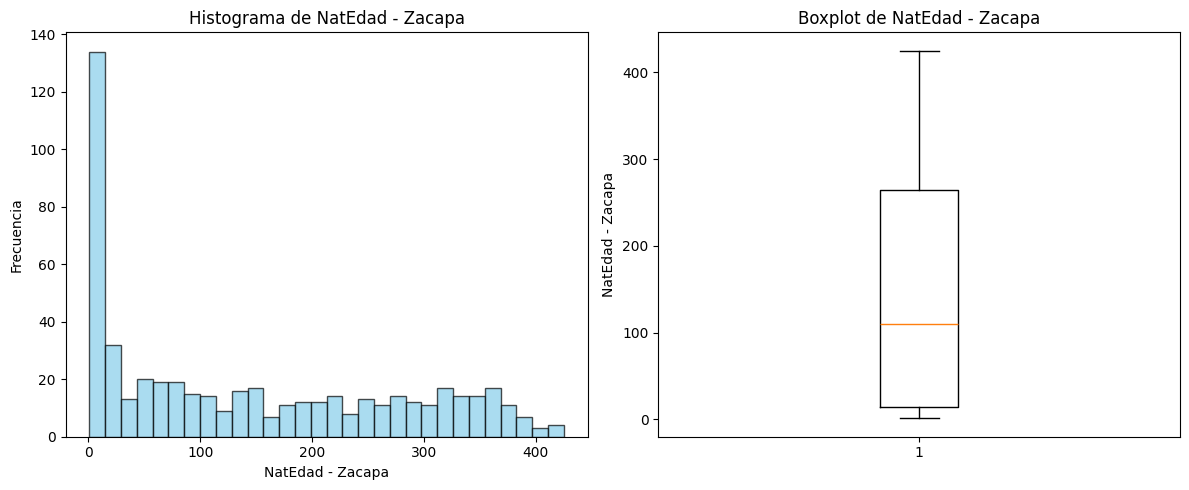

⚠️ La columna 'Chiquimula' tiene 116 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13902946548970351870
p-value = 0.00000000149864172567
Se rechaza la hipótesis nula: los datos de 'NatEdad - Chiquimula' NO provienen de una distribución normal.



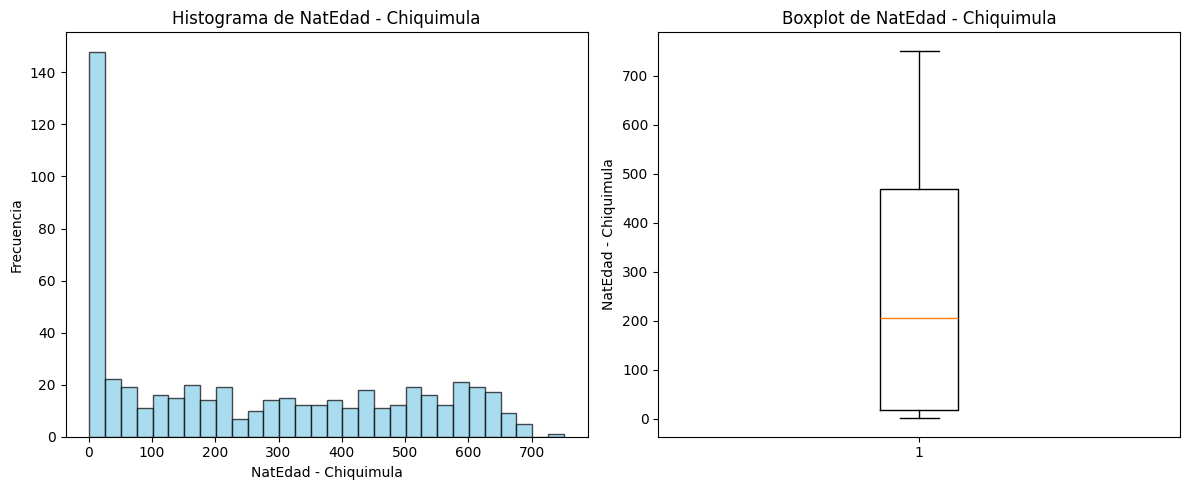

⚠️ La columna 'Jalapa' tiene 144 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.12597686022755605340
p-value = 0.00000015792804669263
Se rechaza la hipótesis nula: los datos de 'NatEdad - Jalapa' NO provienen de una distribución normal.



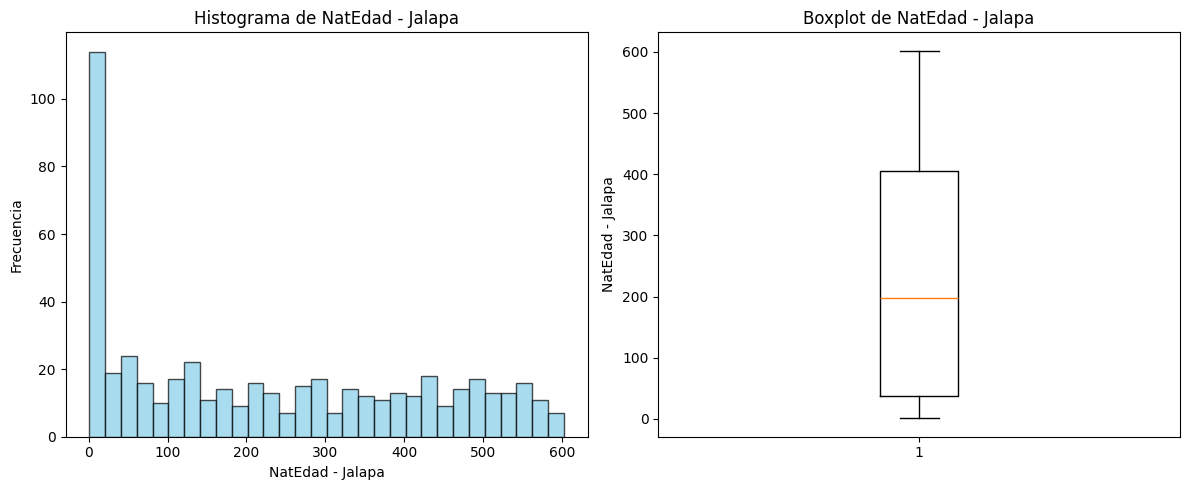

⚠️ La columna 'Jutiapa' tiene 118 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13884180898164999451
p-value = 0.00000000171395971779
Se rechaza la hipótesis nula: los datos de 'NatEdad - Jutiapa' NO provienen de una distribución normal.



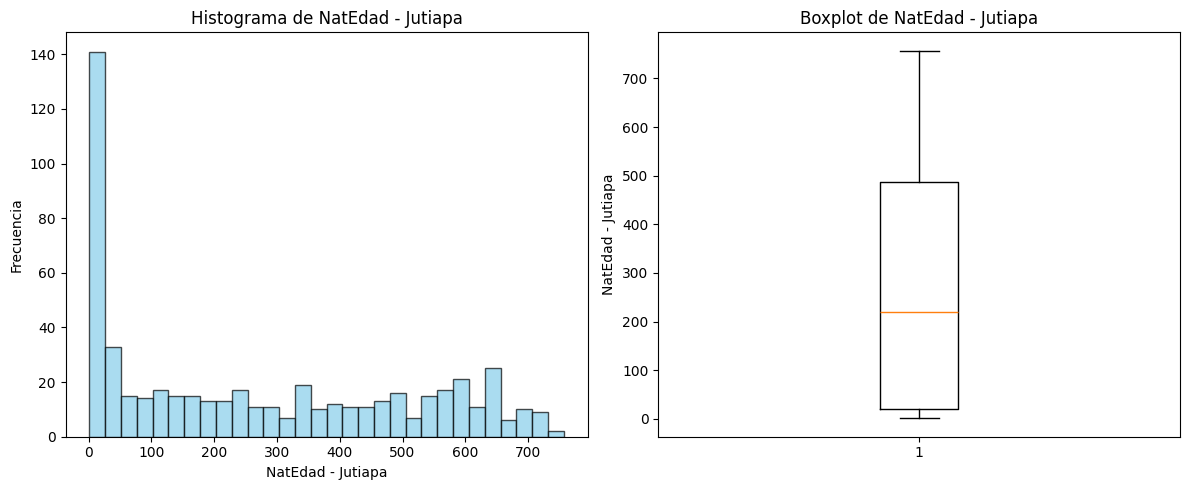

⚠️ La columna 'Extranjero' tiene 279 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13028322617447918308
p-value = 0.00000503370349841134
Se rechaza la hipótesis nula: los datos de 'NatEdad - Extranjero' NO provienen de una distribución normal.



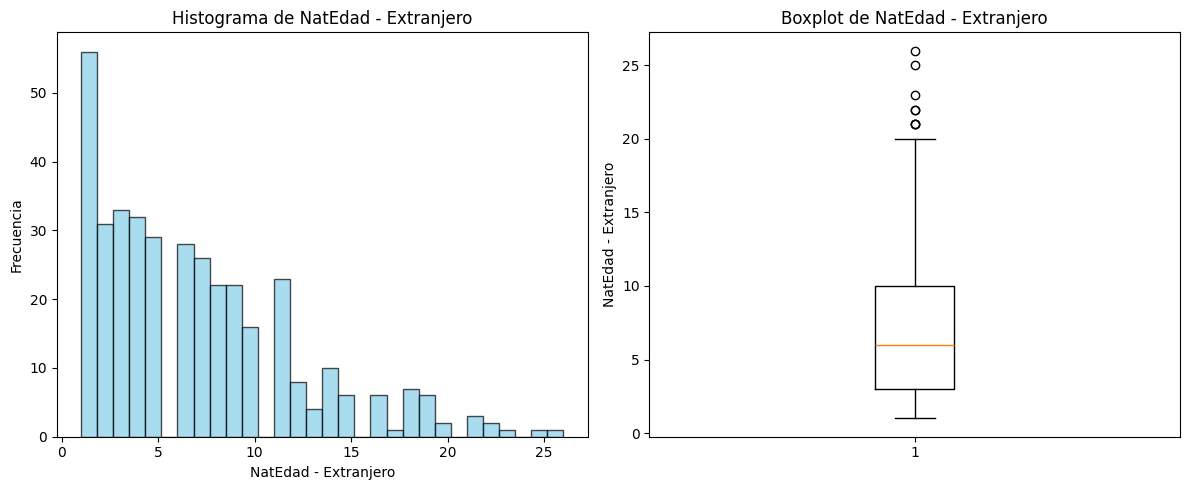

⚠️ La columna 'Ignorado' tiene 516 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.41790556469280398799
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEdad - Ignorado' NO provienen de una distribución normal.



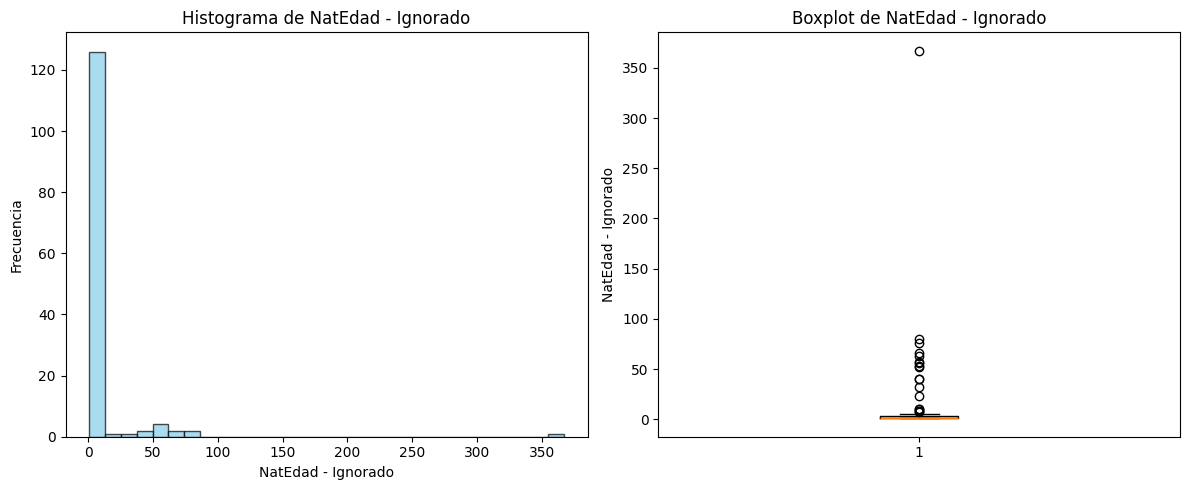

********************************************************************************************

🔹 **Analizando archivo: NatEdadEC**

Estadístico de prueba (ks_statistic) = 0.16904577698142064790
p-value = 0.00000057828177456297
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Total' NO provienen de una distribución normal.



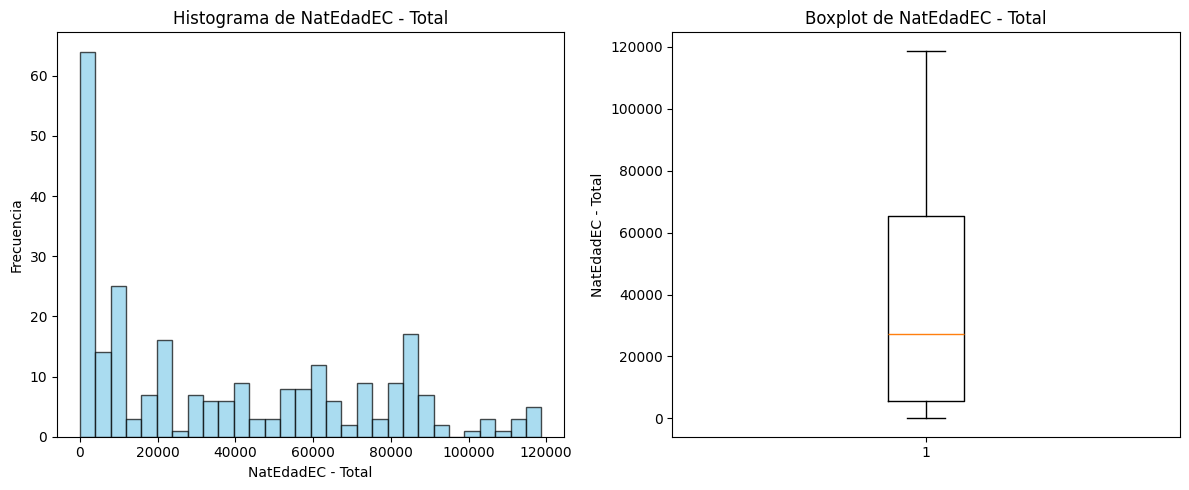

Estadístico de prueba (ks_statistic) = 0.19667780868030515506
p-value = 0.00000000274570254387
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Soltero(a)' NO provienen de una distribución normal.



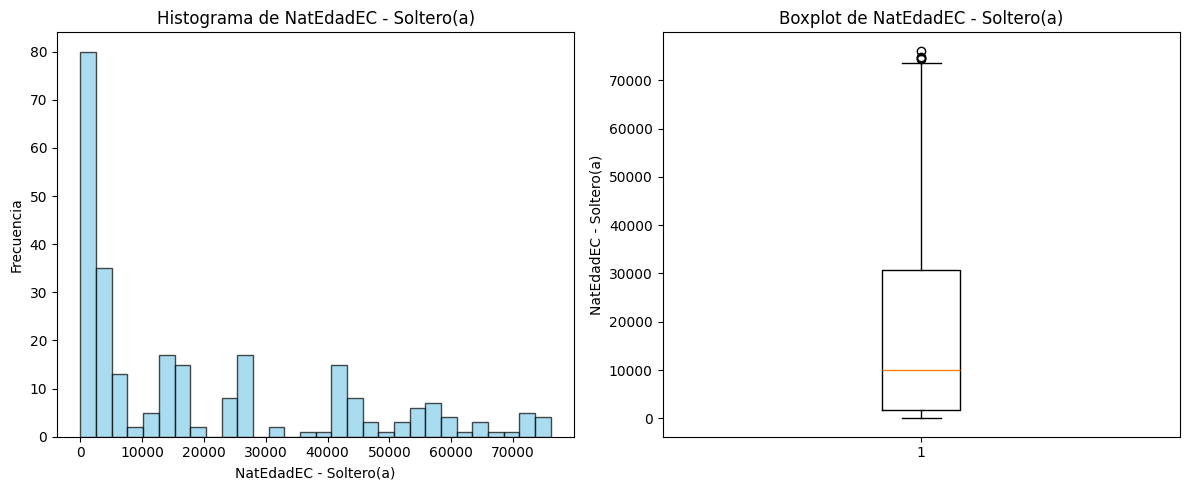

⚠️ La columna 'Casado(a)' tiene 17 ceros en el archivo 'NatEdadEC'.
Estadístico de prueba (ks_statistic) = 0.20217995479533229508
p-value = 0.00000000348320963512
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Casado(a)' NO provienen de una distribución normal.



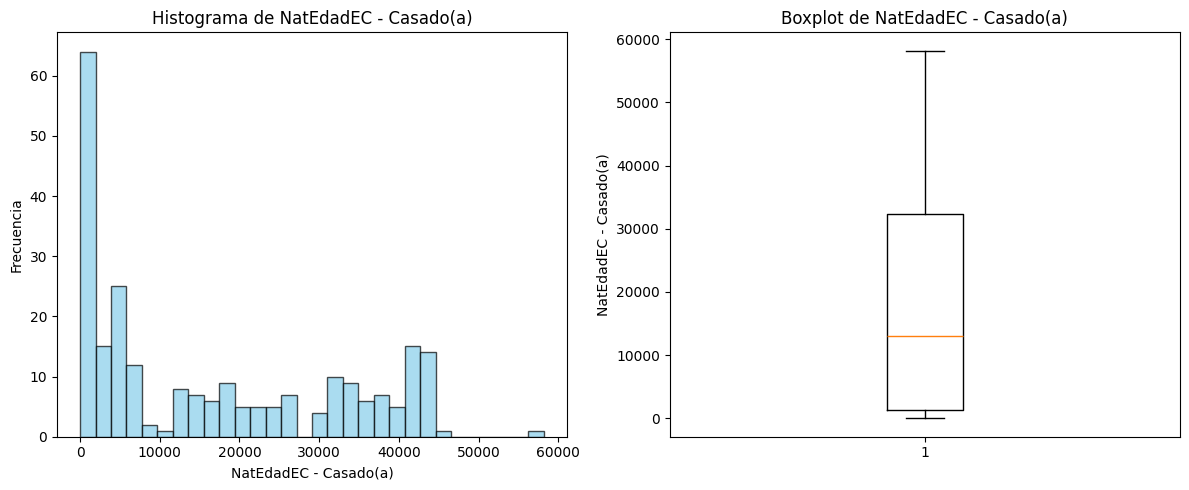

⚠️ La columna 'Unido(a)' tiene 50 ceros en el archivo 'NatEdadEC'.
Estadístico de prueba (ks_statistic) = 0.15685926720059278905
p-value = 0.00005587592857962244
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Unido(a)' NO provienen de una distribución normal.



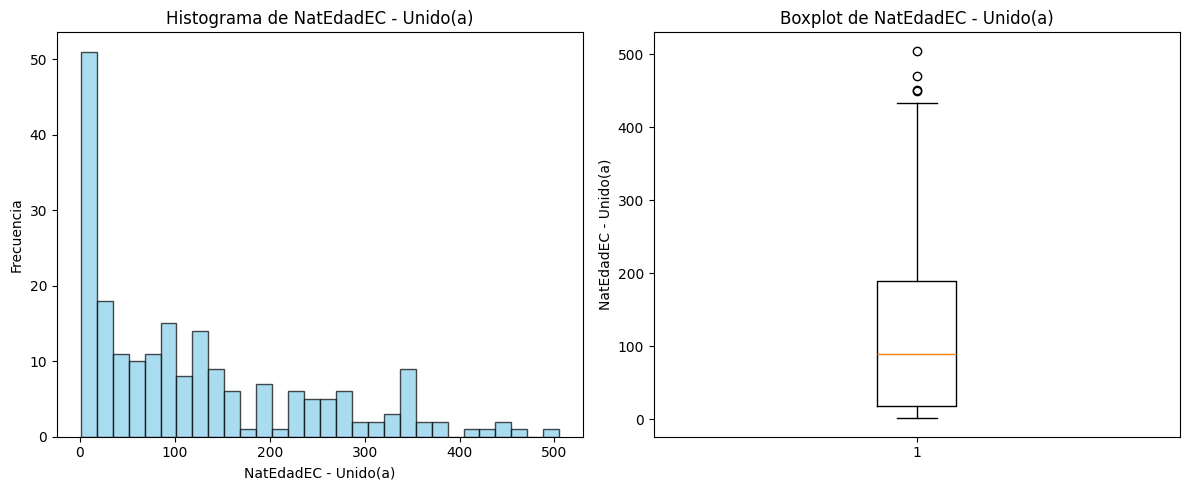

⚠️ La columna 'Ignorado' tiene 43 ceros en el archivo 'NatEdadEC'.
Estadístico de prueba (ks_statistic) = 0.53479663101302477024
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Ignorado' NO provienen de una distribución normal.



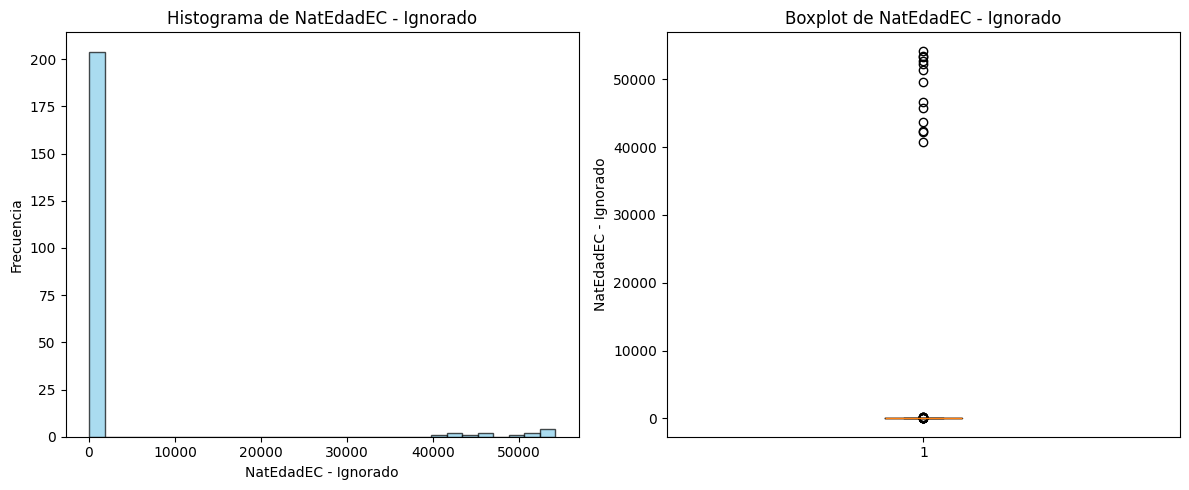

********************************************************************************************

🔹 **Analizando archivo: NatEscolaridad**

Estadístico de prueba (ks_statistic) = 0.29067512055991528985
p-value = 0.00000000000000005869
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Total' NO provienen de una distribución normal.



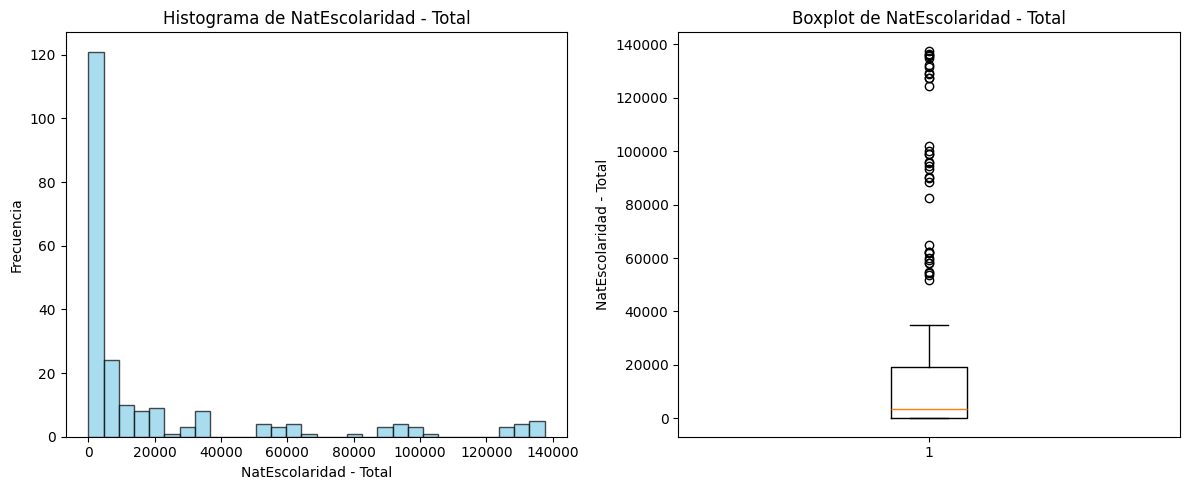

Estadístico de prueba (ks_statistic) = 0.22225351437585466607
p-value = 0.00000000050107539801
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Ninguno' NO provienen de una distribución normal.



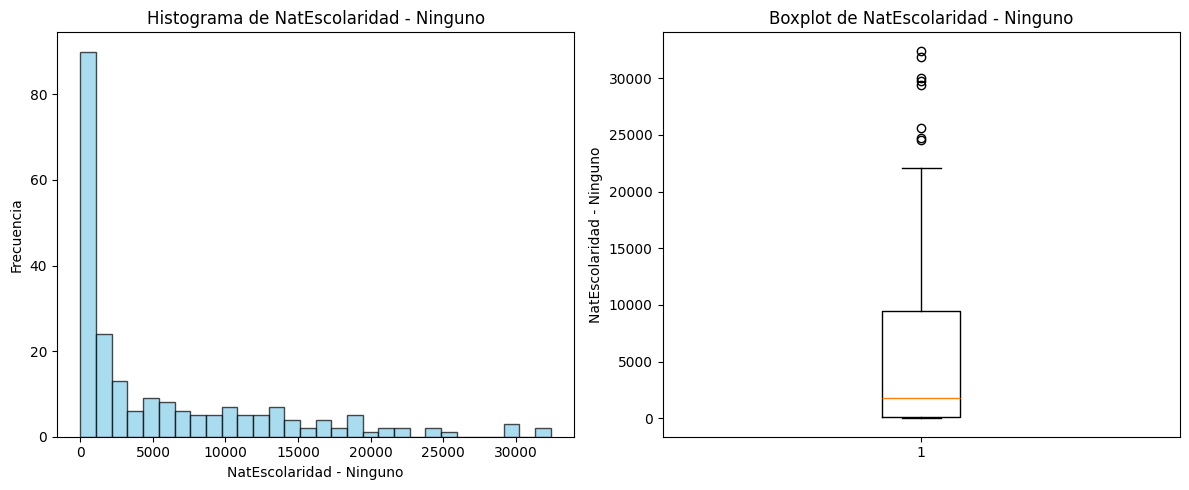

⚠️ La columna 'Primaria' tiene 8 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30810652237016866728
p-value = 0.00000000000000000229
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Primaria' NO provienen de una distribución normal.



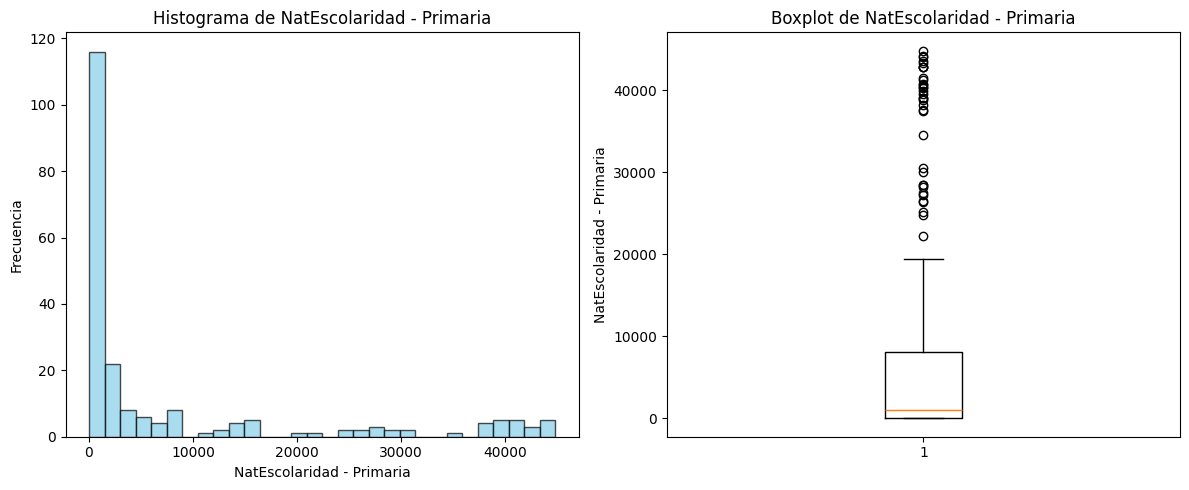

⚠️ La columna 'Básica' tiene 60 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.33540133487261925005
p-value = 0.00000000000000014917
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Básica' NO provienen de una distribución normal.



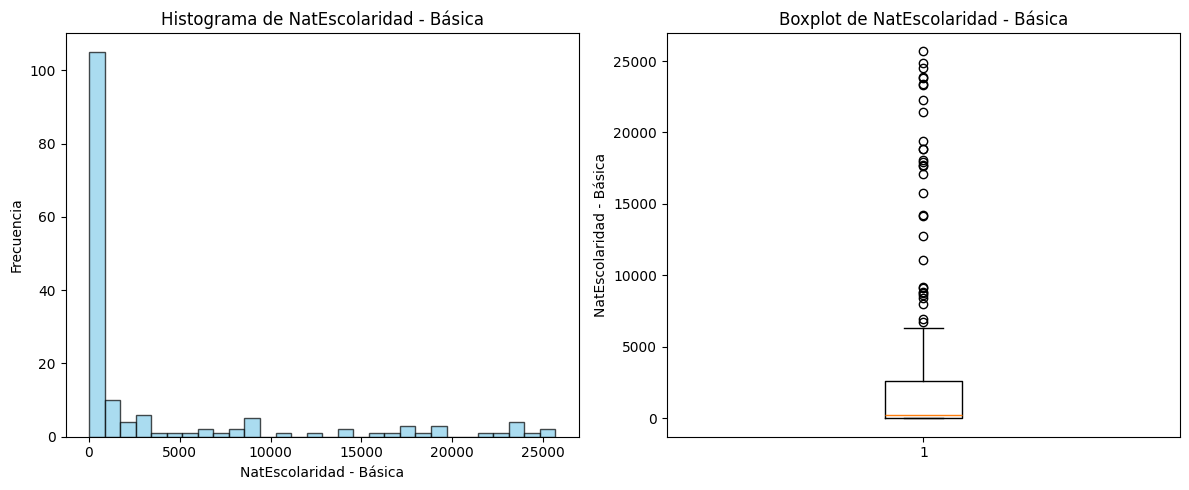

⚠️ La columna 'Diversificado' tiene 82 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.35423584583413131321
p-value = 0.00000000000000053616
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Diversificado' NO provienen de una distribución normal.



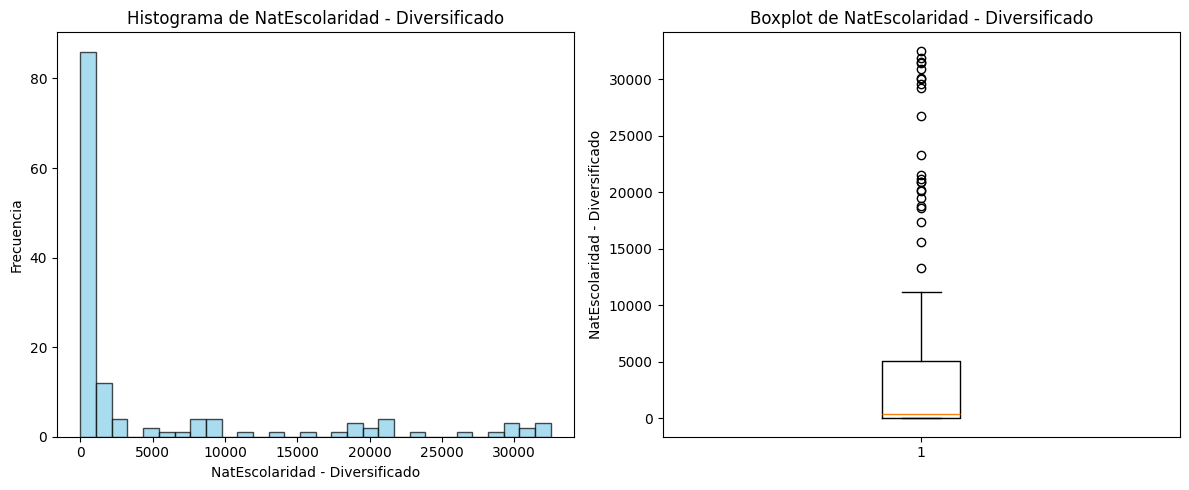

⚠️ La columna 'Universitario' tiene 119 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.32838398754195052831
p-value = 0.00000000033420347127
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Universitario' NO provienen de una distribución normal.



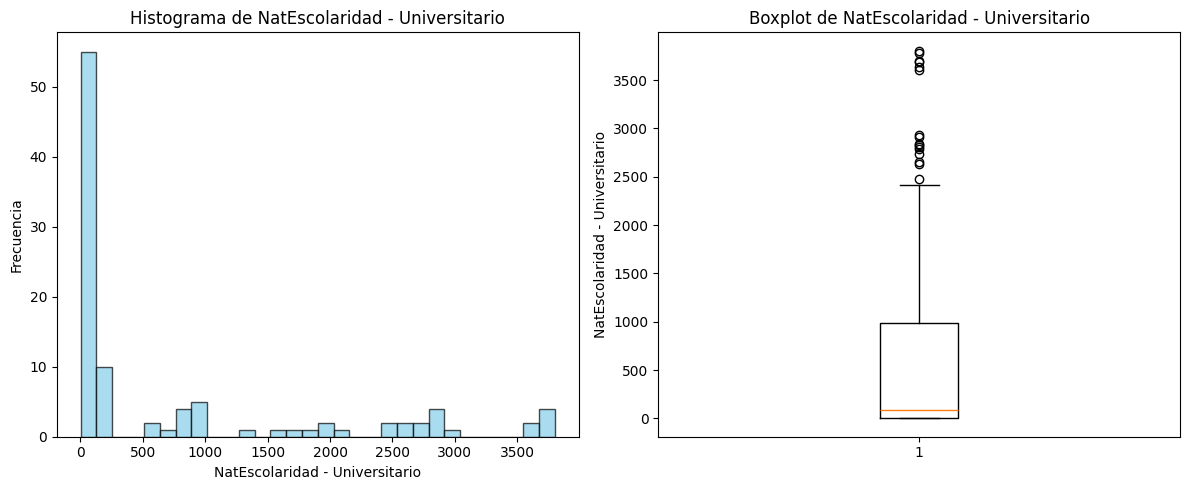

⚠️ La columna 'Post Grado' tiene 92 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.20103112262863426229
p-value = 0.10240913947133178930
No se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Post Grado' parecen provenir de una distribución normal.



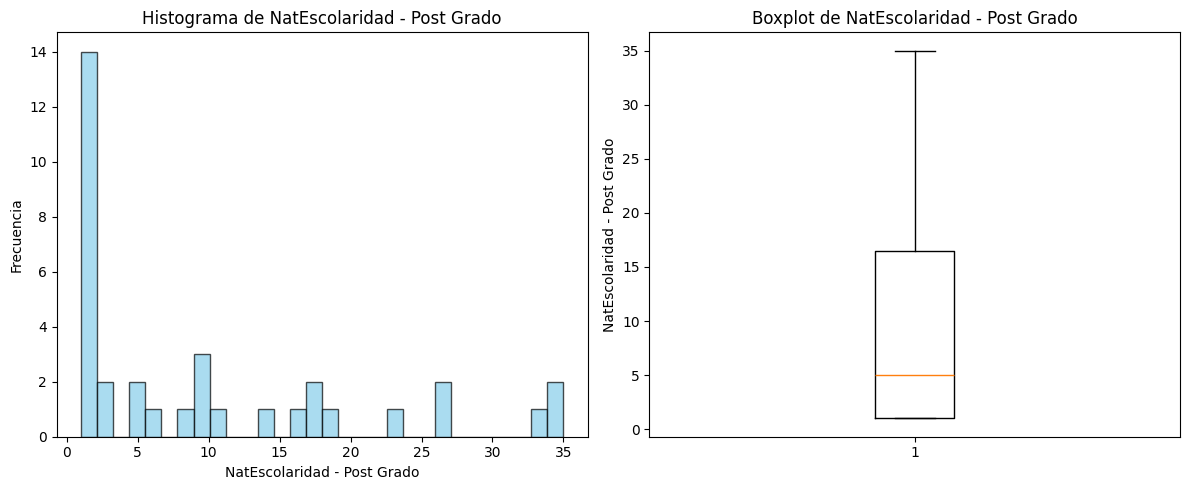

⚠️ La columna 'Doctorado' tiene 95 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.29222387718394743361
p-value = 0.14893046981675883700
No se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Doctorado' parecen provenir de una distribución normal.



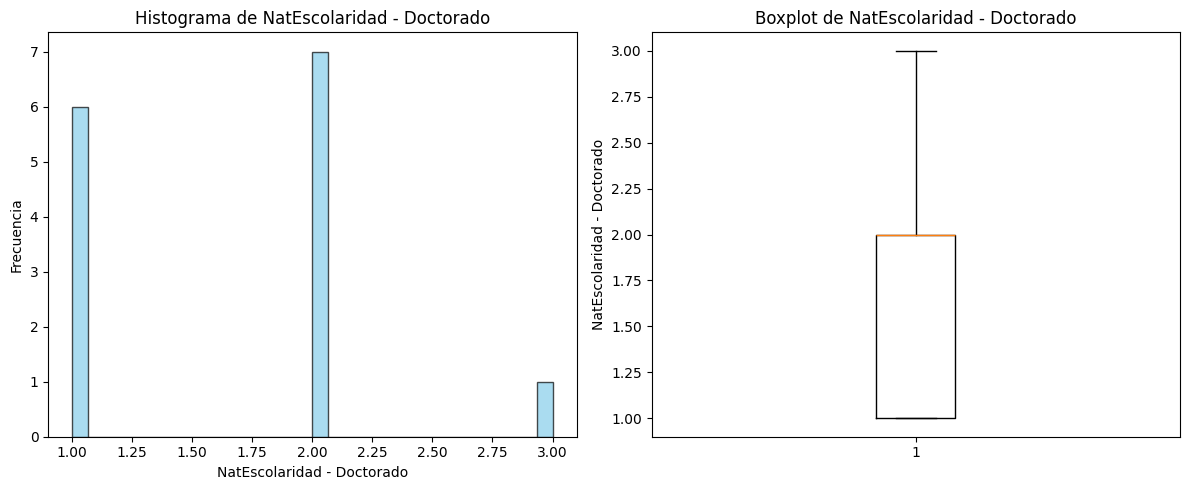

⚠️ La columna 'Ignorado' tiene 41 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.35161602032204680723
p-value = 0.00000000000000000003
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Ignorado' NO provienen de una distribución normal.



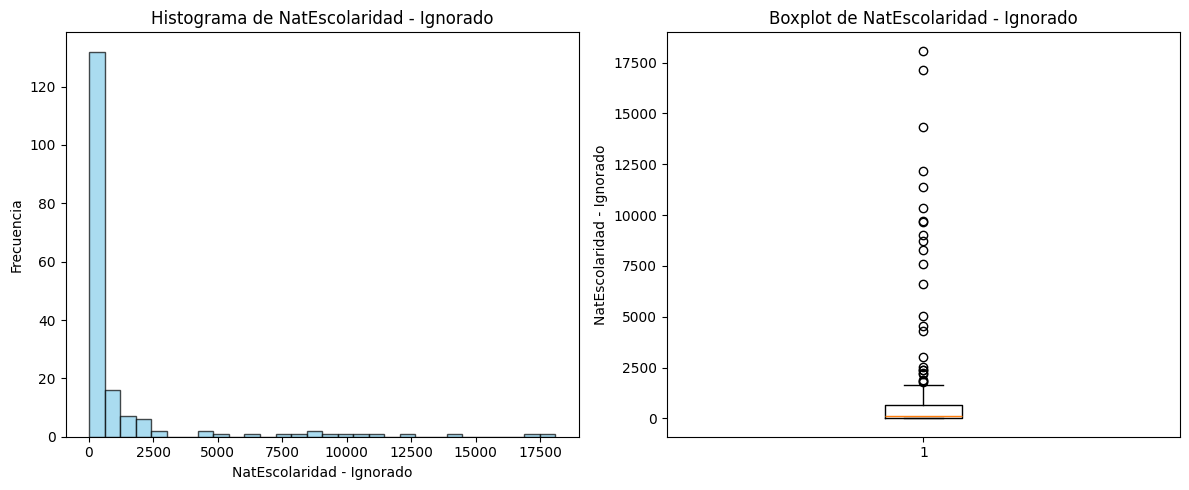

⚠️ La columna 'Post grado' tiene 65 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.31311891109898848384
p-value = 0.00614649540729461652
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Post grado' NO provienen de una distribución normal.



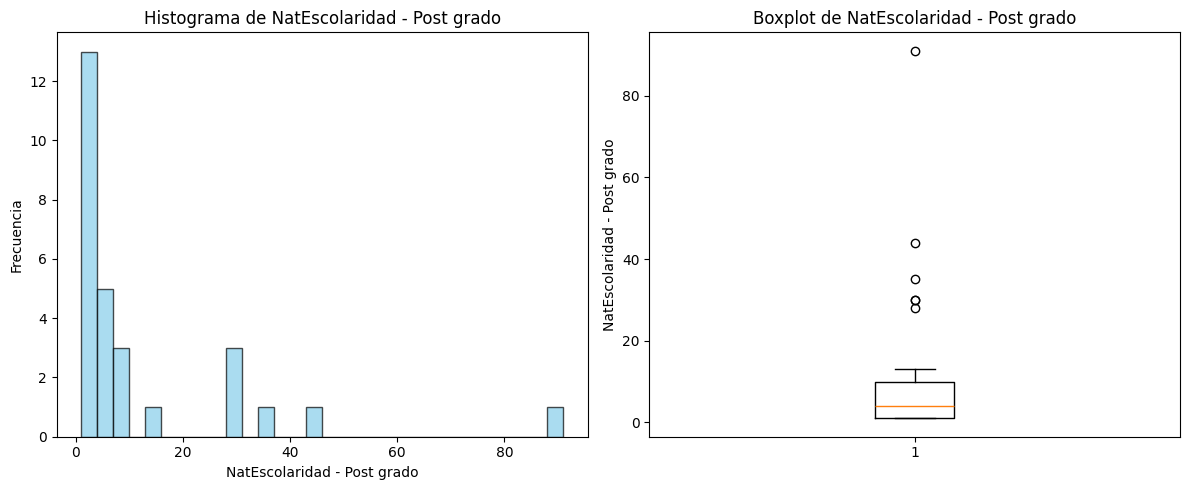

********************************************************************************************

🔹 **Analizando archivo: NatEtniaArea**

⚠️ La columna 'Total' tiene 268 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.30522280710169602536
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - Total' NO provienen de una distribución normal.



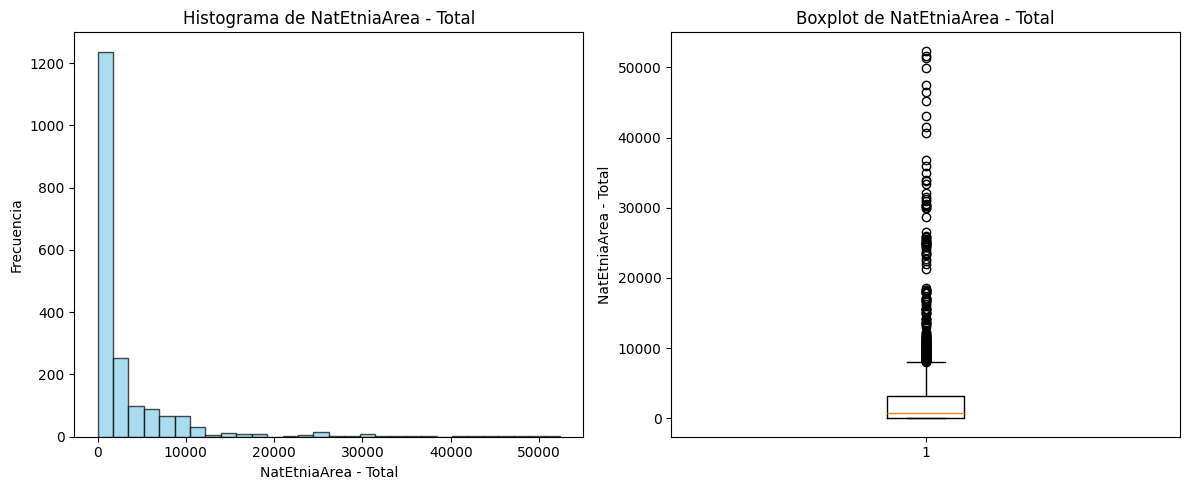

⚠️ La columna 'Menos de 15' tiene 992 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.22576414586183929378
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - Menos de 15' NO provienen de una distribución normal.



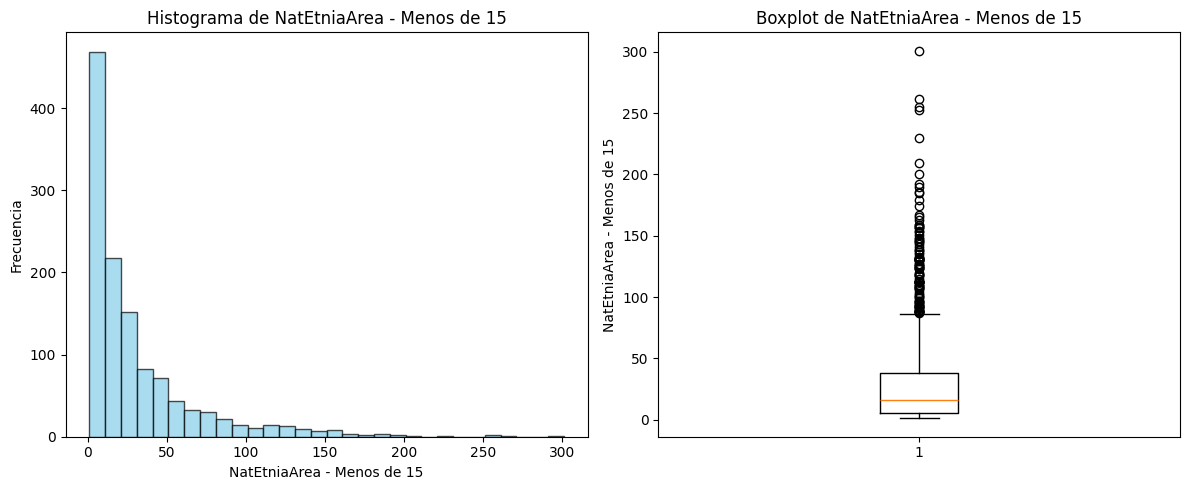

⚠️ La columna '15 - 19' tiene 441 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.26508253195196518348
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 15 - 19' NO provienen de una distribución normal.



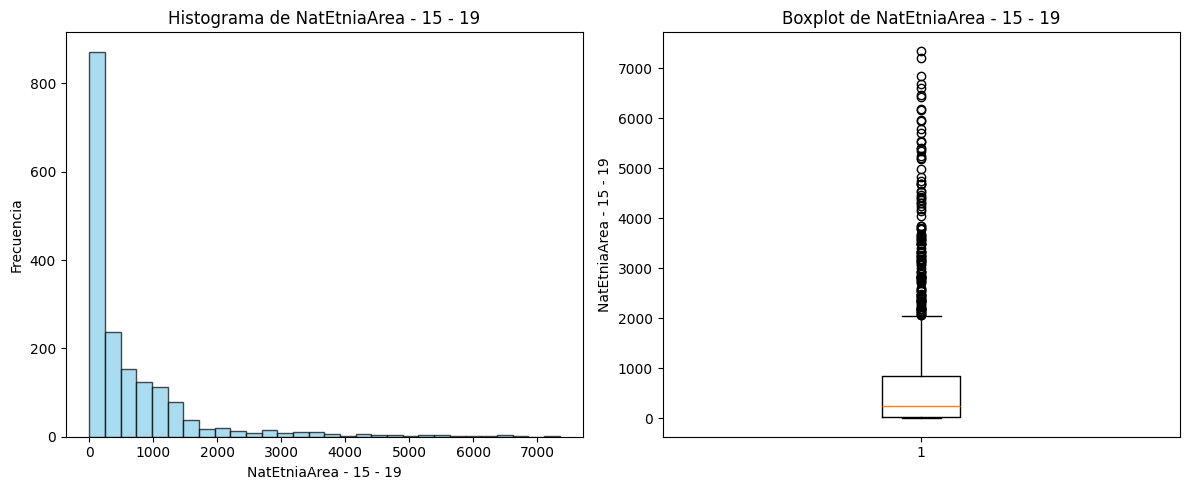

⚠️ La columna '20 - 24' tiene 396 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.30180355029989291982
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 20 - 24' NO provienen de una distribución normal.



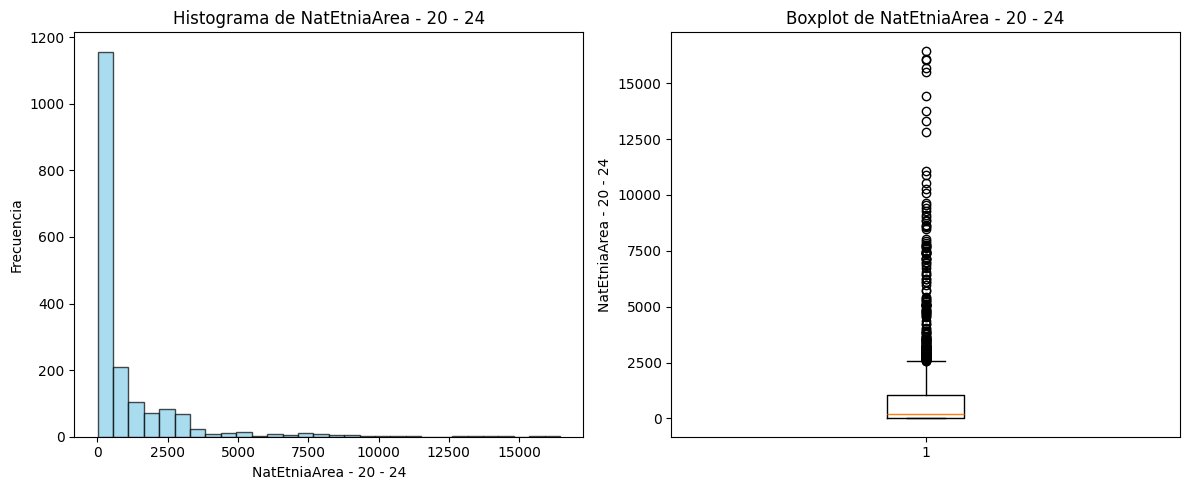

⚠️ La columna '25 - 29' tiene 429 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.31034625955446581980
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 25 - 29' NO provienen de una distribución normal.



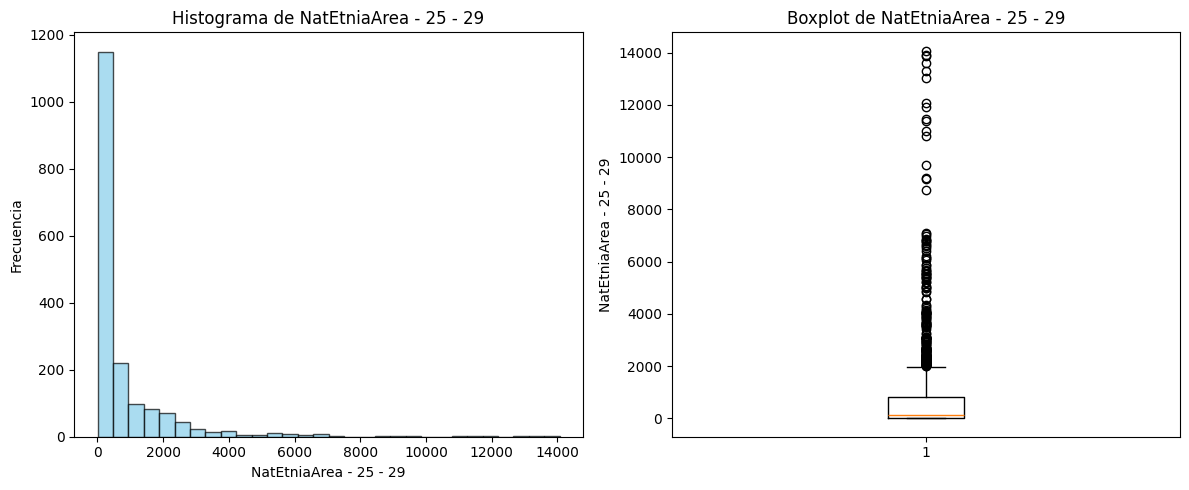

⚠️ La columna '30 - 34' tiene 472 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.31265403031822902591
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 30 - 34' NO provienen de una distribución normal.



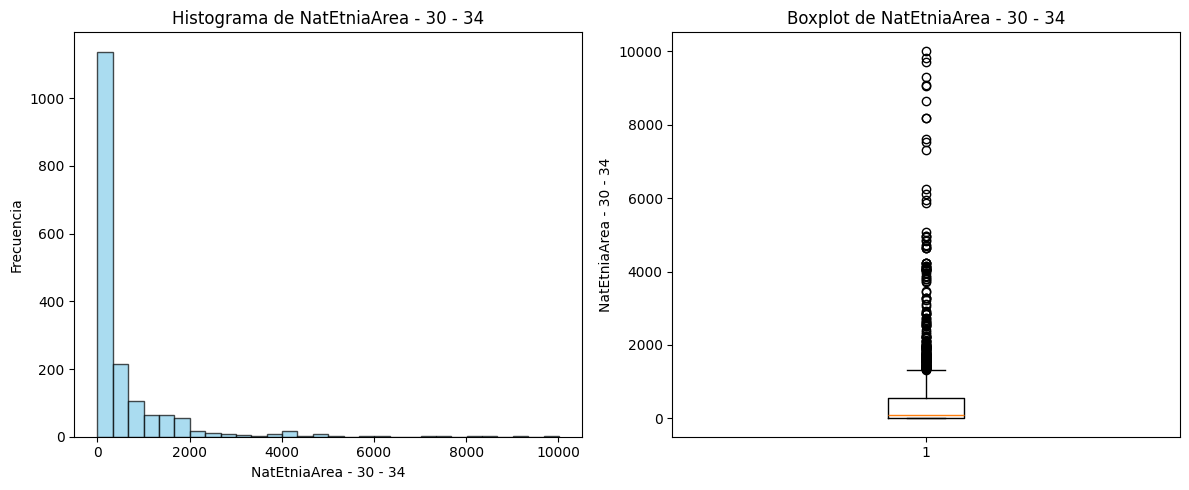

⚠️ La columna '35 - 39' tiene 549 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.30668982026133861929
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 35 - 39' NO provienen de una distribución normal.



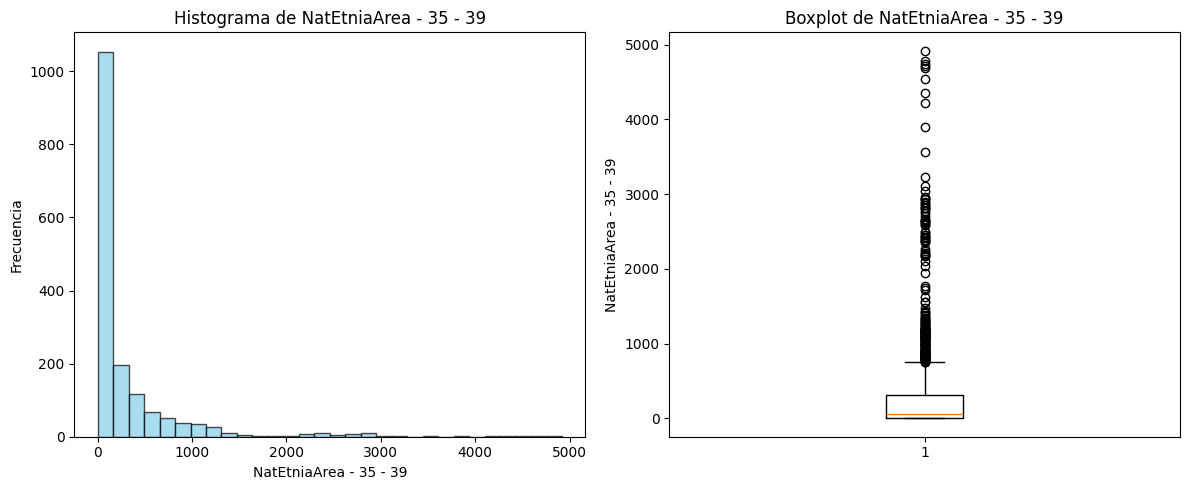

⚠️ La columna '40 - 44' tiene 667 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.29173973059803598451
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 40 - 44' NO provienen de una distribución normal.



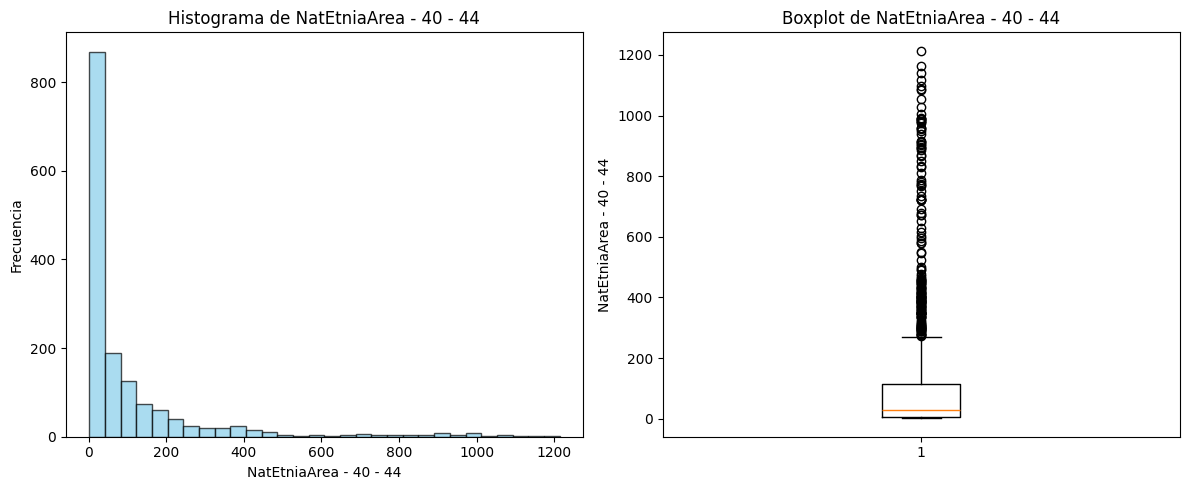

⚠️ La columna '45 - 49' tiene 1094 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.26281079778631399879
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 45 - 49' NO provienen de una distribución normal.



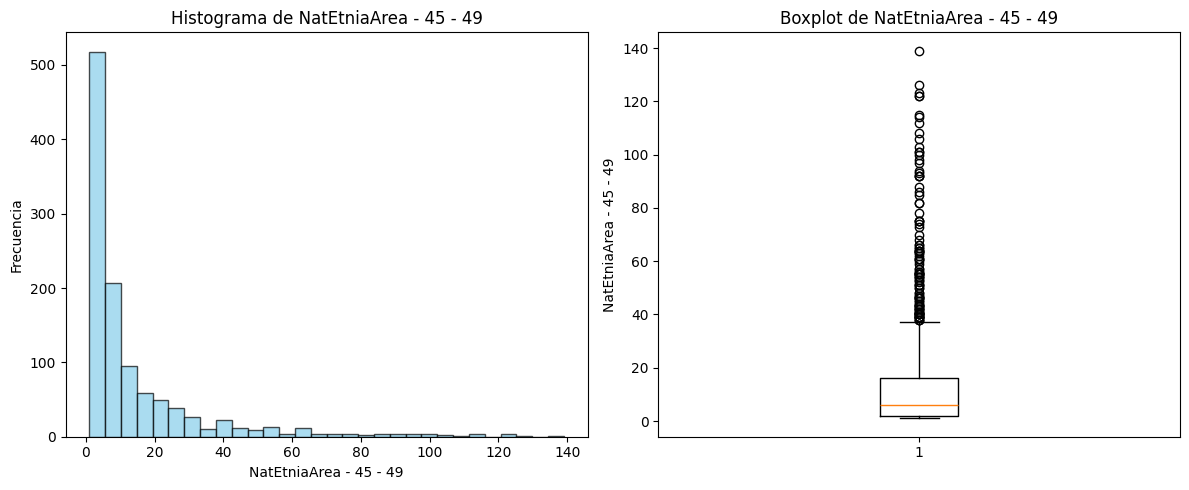

⚠️ La columna '50 y más' tiene 1560 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.28294309251316746012
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - 50 y más' NO provienen de una distribución normal.



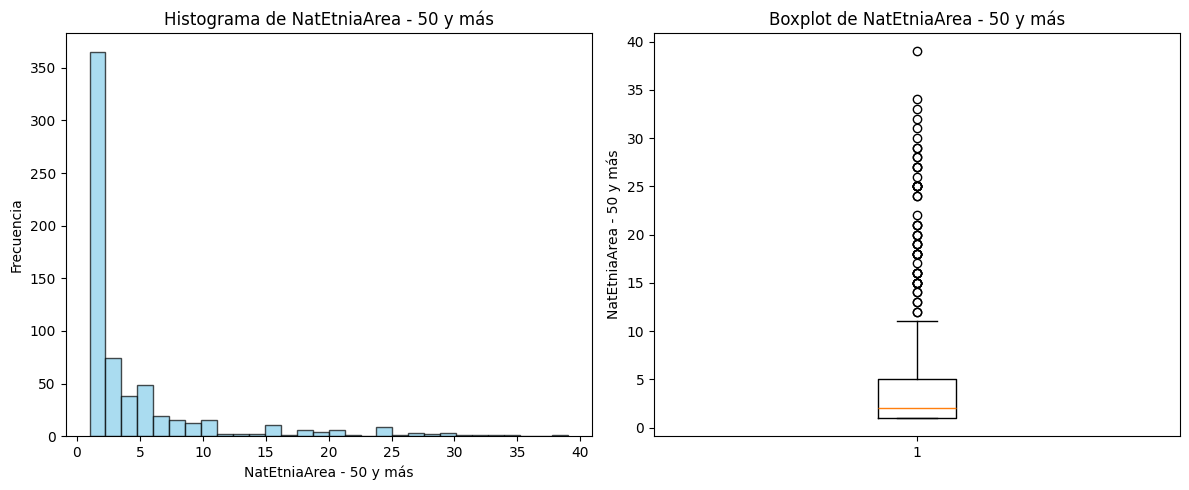

⚠️ La columna 'Ignorado' tiene 1458 ceros en el archivo 'NatEtniaArea'.
Estadístico de prueba (ks_statistic) = 0.35305532123064098382
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEtniaArea - Ignorado' NO provienen de una distribución normal.



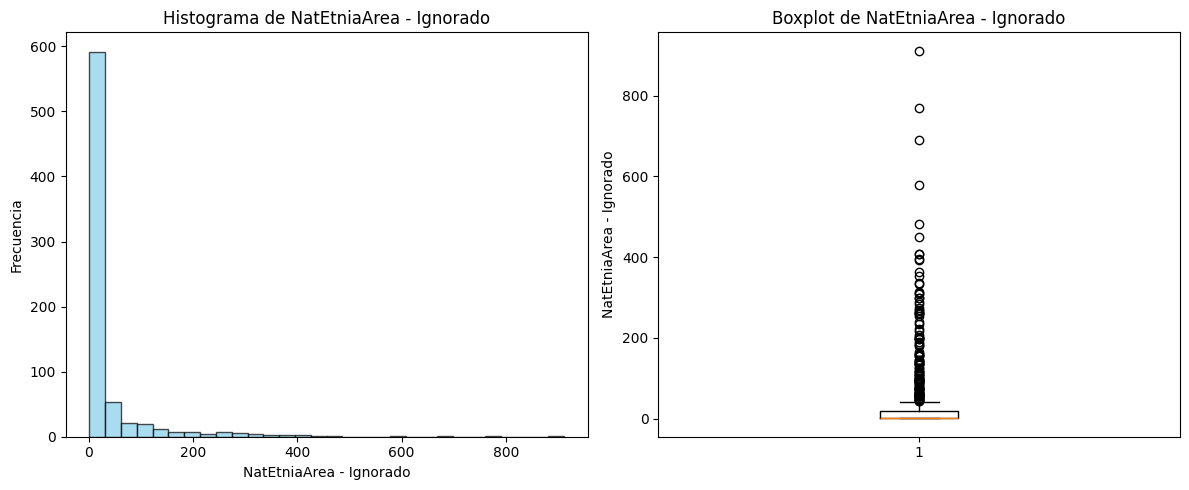

********************************************************************************************

🔹 **Analizando archivo: NatNum**

Estadístico de prueba (ks_statistic) = 0.19937147327842347222
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatNum - Total' NO provienen de una distribución normal.



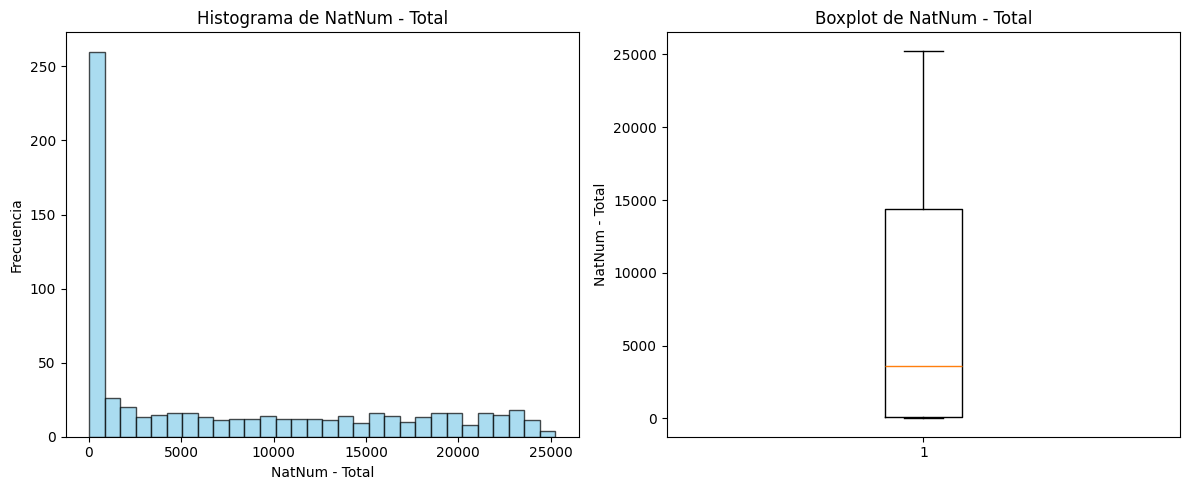

⚠️ La columna '1' tiene 51 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.25167139833278207028
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatNum - 1' NO provienen de una distribución normal.



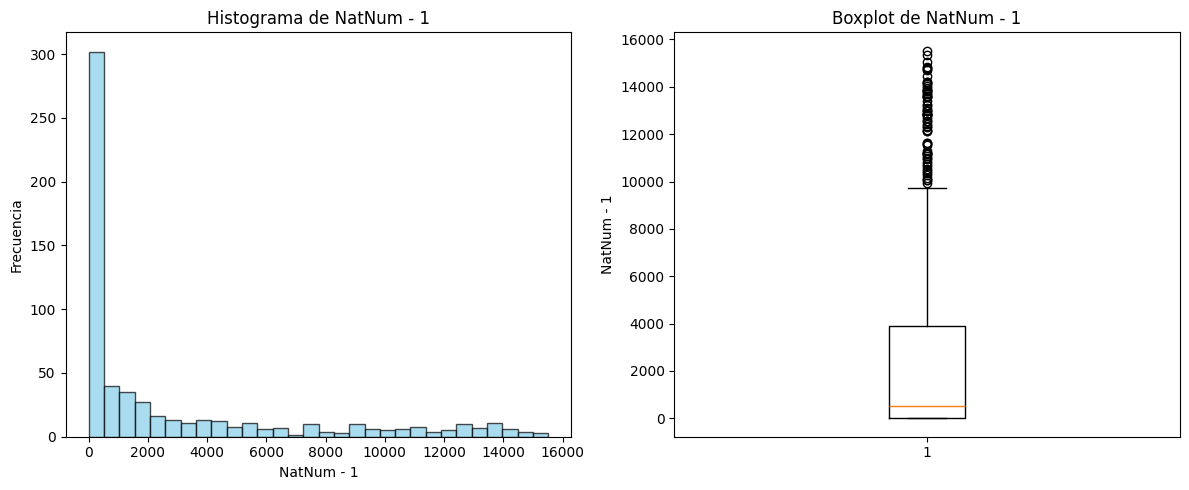

⚠️ La columna '2' tiene 94 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.22042036843984547101
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatNum - 2' NO provienen de una distribución normal.



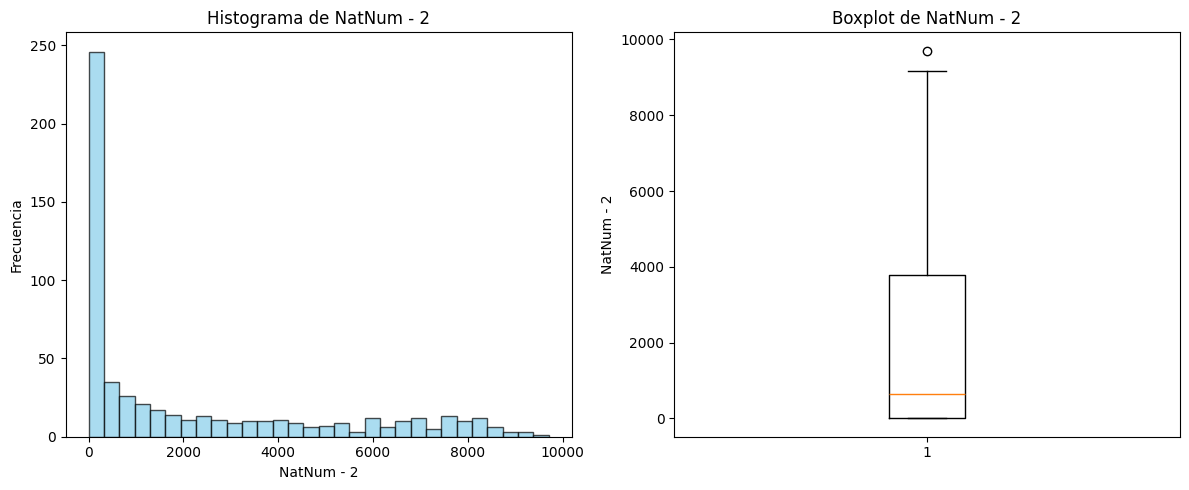

⚠️ La columna '3' tiene 130 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.20700446373700298608
p-value = 0.00000000000000000003
Se rechaza la hipótesis nula: los datos de 'NatNum - 3' NO provienen de una distribución normal.



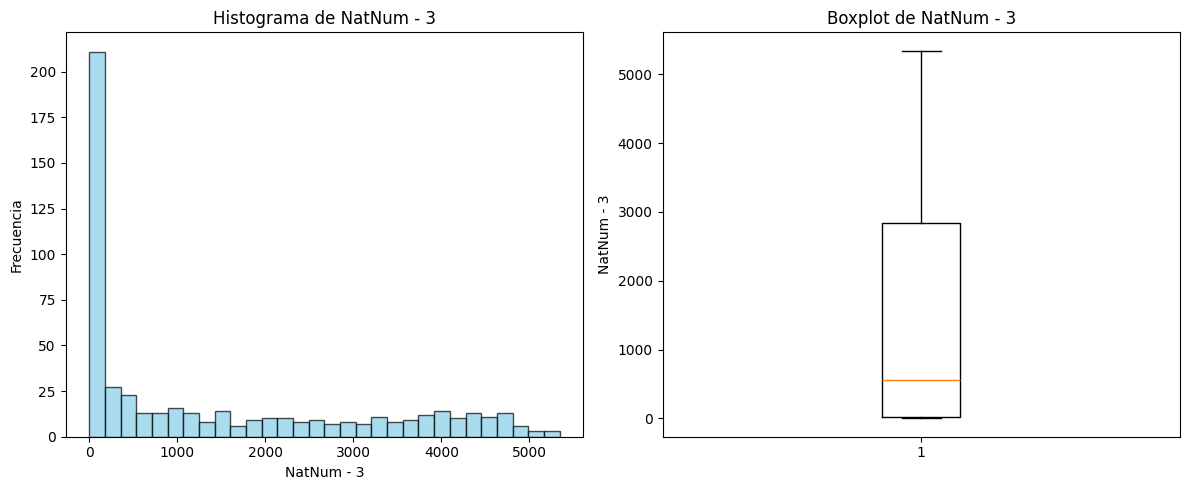

⚠️ La columna '4' tiene 149 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.20176473861897520345
p-value = 0.00000000000000000156
Se rechaza la hipótesis nula: los datos de 'NatNum - 4' NO provienen de una distribución normal.



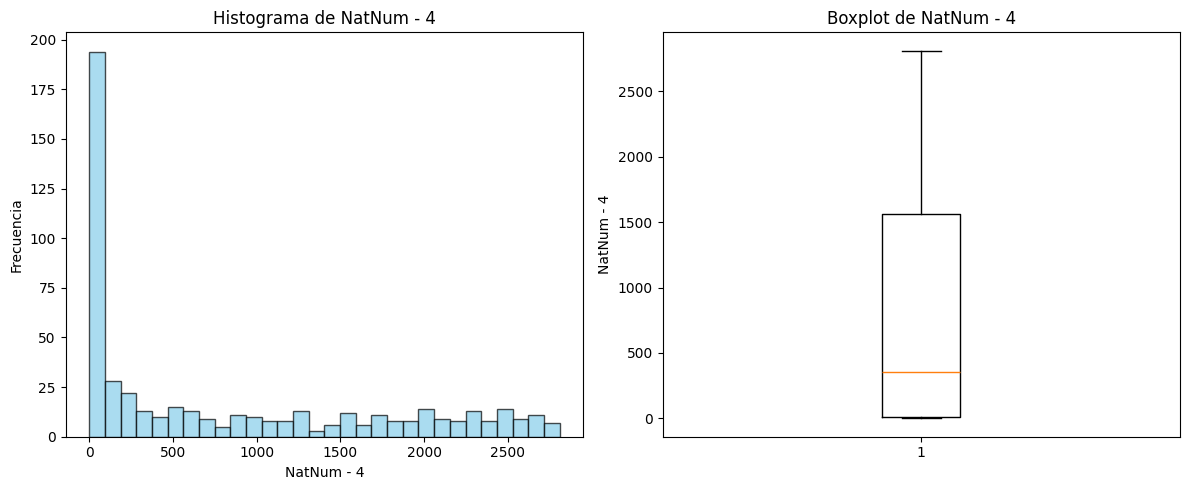

⚠️ La columna '5' tiene 167 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.19985039099304008348
p-value = 0.00000000000000001470
Se rechaza la hipótesis nula: los datos de 'NatNum - 5' NO provienen de una distribución normal.



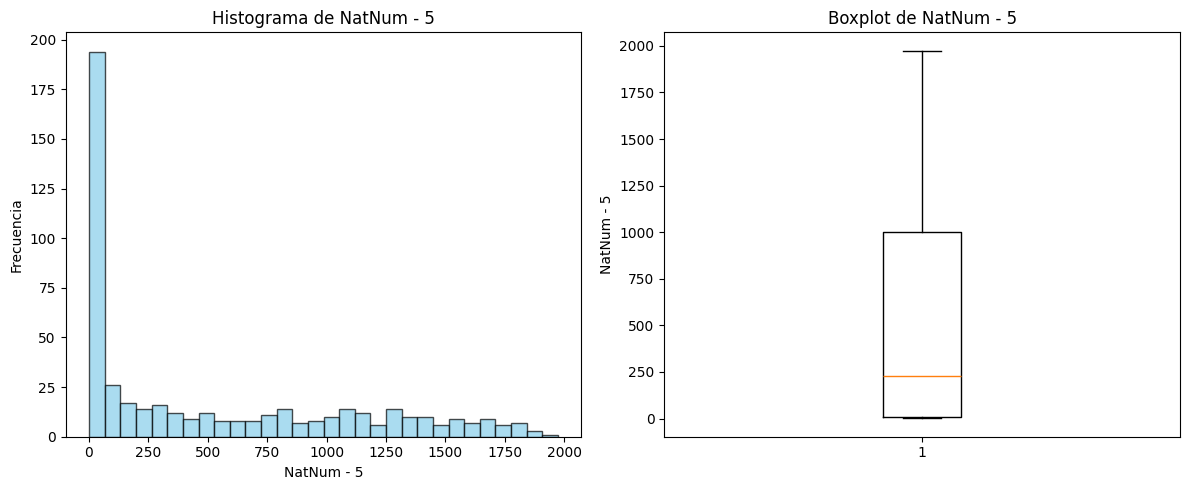

⚠️ La columna '6' tiene 187 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.19863540966156517653
p-value = 0.00000000000000011697
Se rechaza la hipótesis nula: los datos de 'NatNum - 6' NO provienen de una distribución normal.



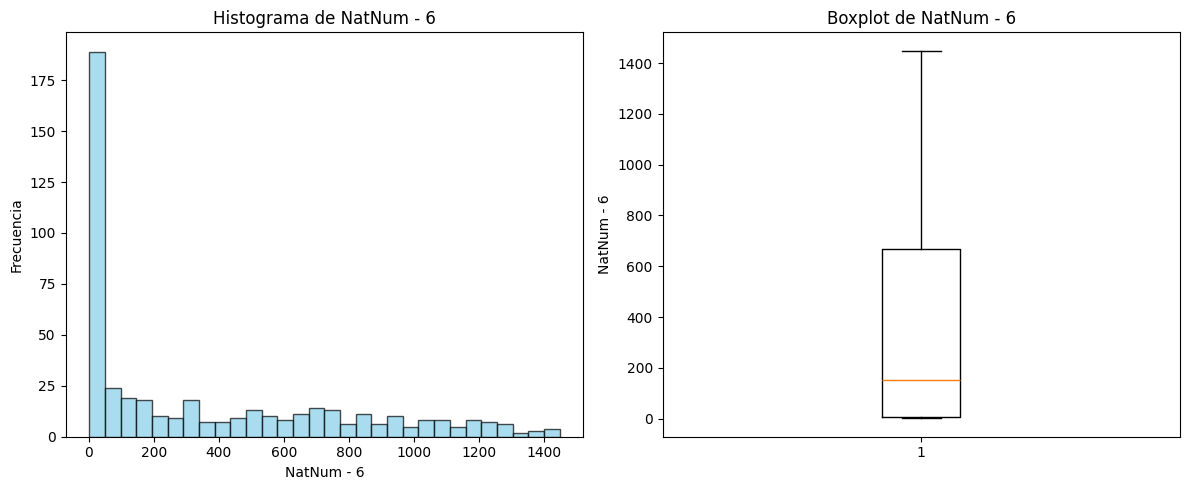

⚠️ La columna '7' tiene 205 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.21065001130393501416
p-value = 0.00000000000000000536
Se rechaza la hipótesis nula: los datos de 'NatNum - 7' NO provienen de una distribución normal.



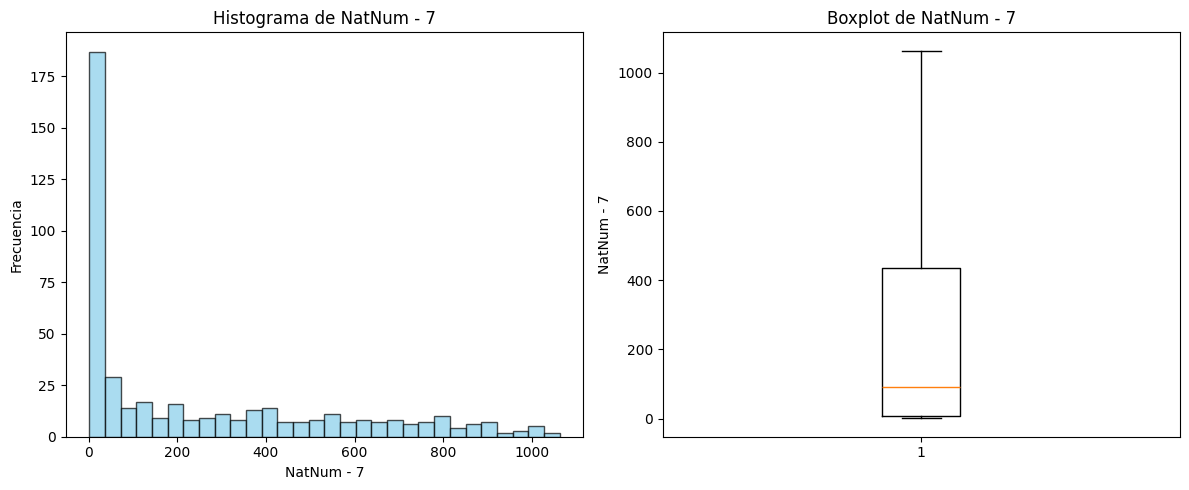

⚠️ La columna '8' tiene 231 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.21878651201460613818
p-value = 0.00000000000000000266
Se rechaza la hipótesis nula: los datos de 'NatNum - 8' NO provienen de una distribución normal.



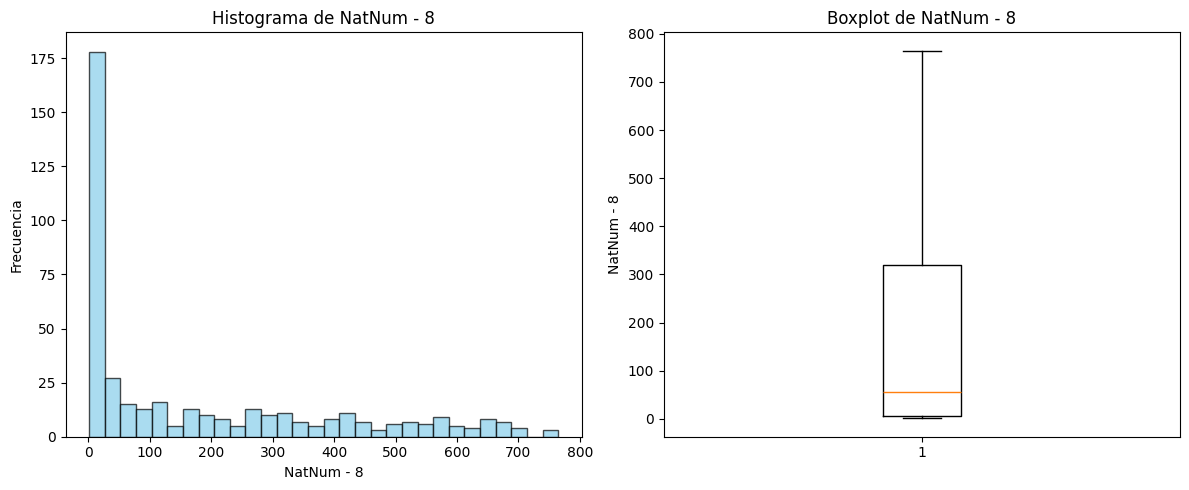

⚠️ La columna '9' tiene 265 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.20549283225645736950
p-value = 0.00000000000000641622
Se rechaza la hipótesis nula: los datos de 'NatNum - 9' NO provienen de una distribución normal.



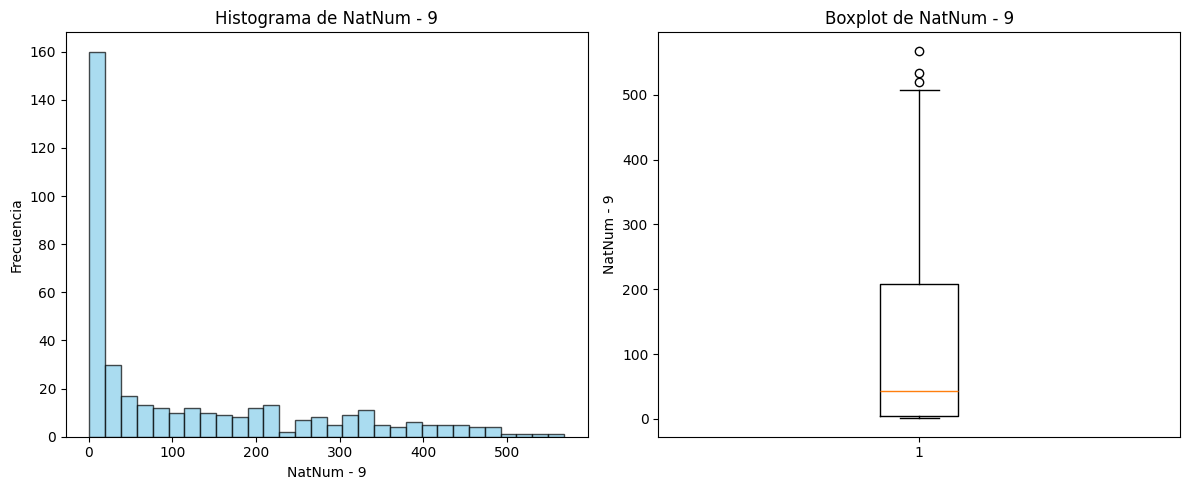

⚠️ La columna '10 y más' tiene 255 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.22892903180015378162
p-value = 0.00000000000000000066
Se rechaza la hipótesis nula: los datos de 'NatNum - 10 y más' NO provienen de una distribución normal.



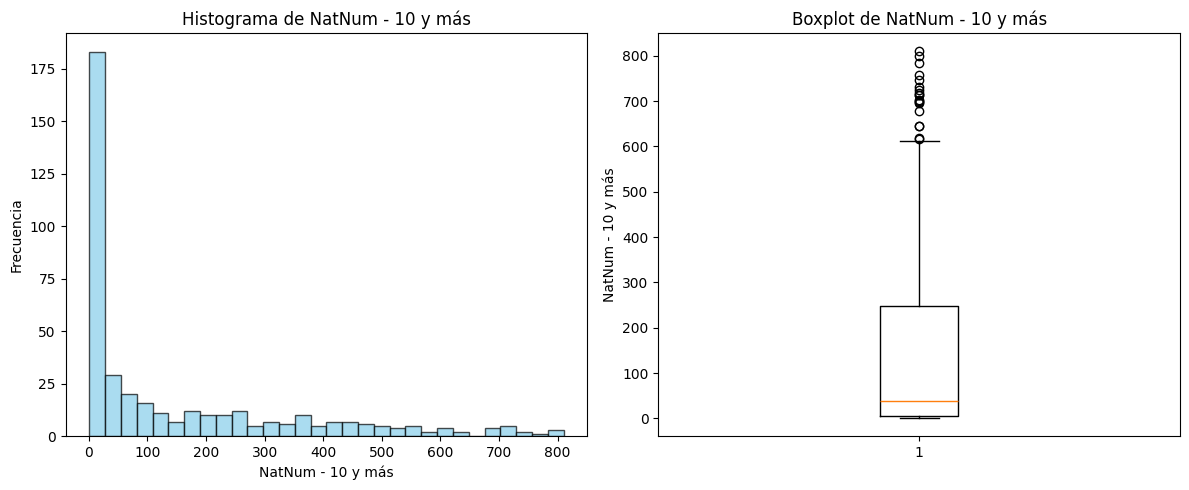

⚠️ La columna 'Ignorado' tiene 177 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.17509166287377647686
p-value = 0.00000000000027500255
Se rechaza la hipótesis nula: los datos de 'NatNum - Ignorado' NO provienen de una distribución normal.



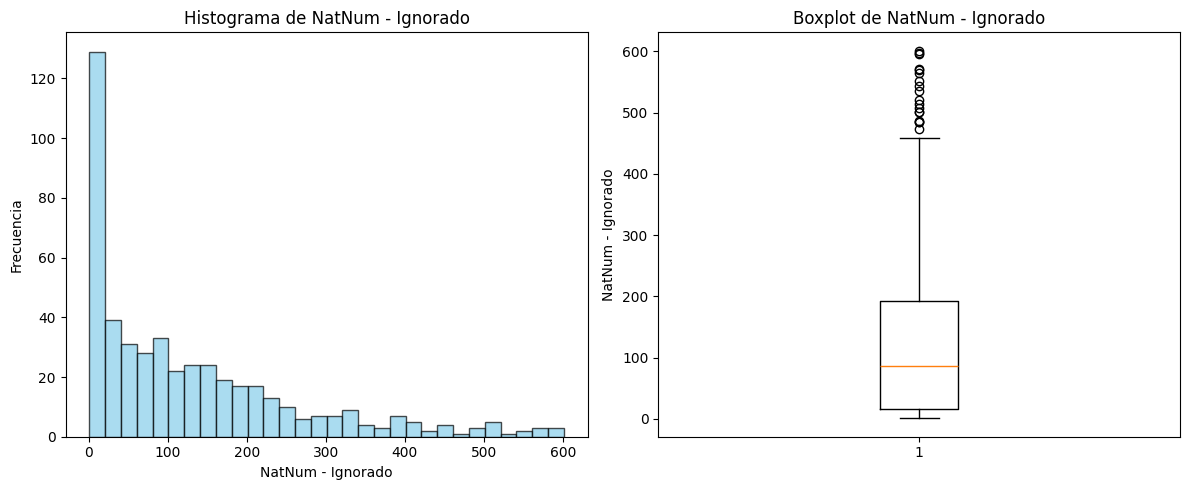

********************************************************************************************

🔹 **Analizando archivo: NatOcup**

⚠️ La columna 'Total' tiene 1 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.46901716406518589864
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - Total' NO provienen de una distribución normal.



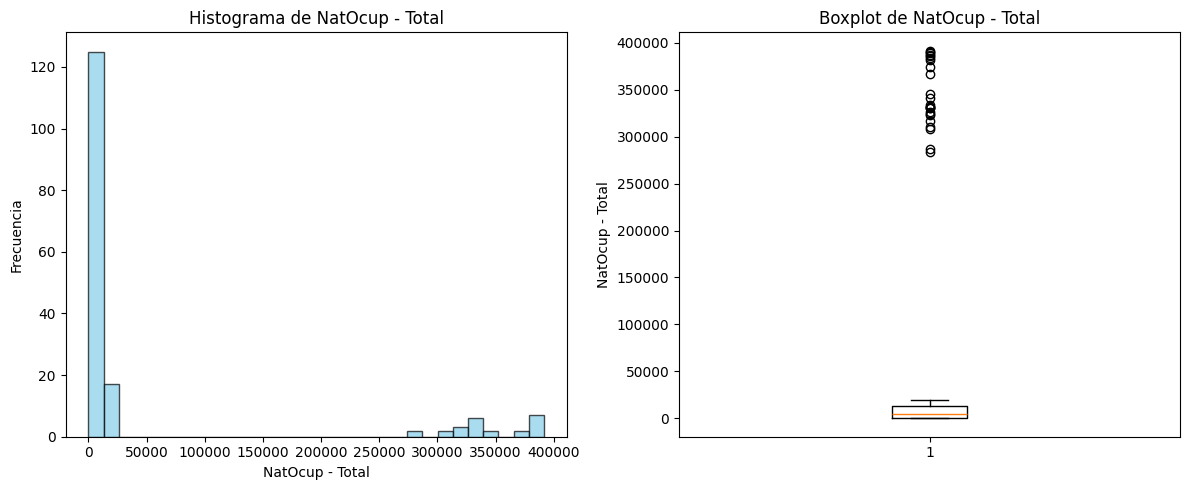

⚠️ La columna 'Menos de 15' tiene 84 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.29553420653388773331
p-value = 0.00000063983145471371
Se rechaza la hipótesis nula: los datos de 'NatOcup - Menos de 15' NO provienen de una distribución normal.



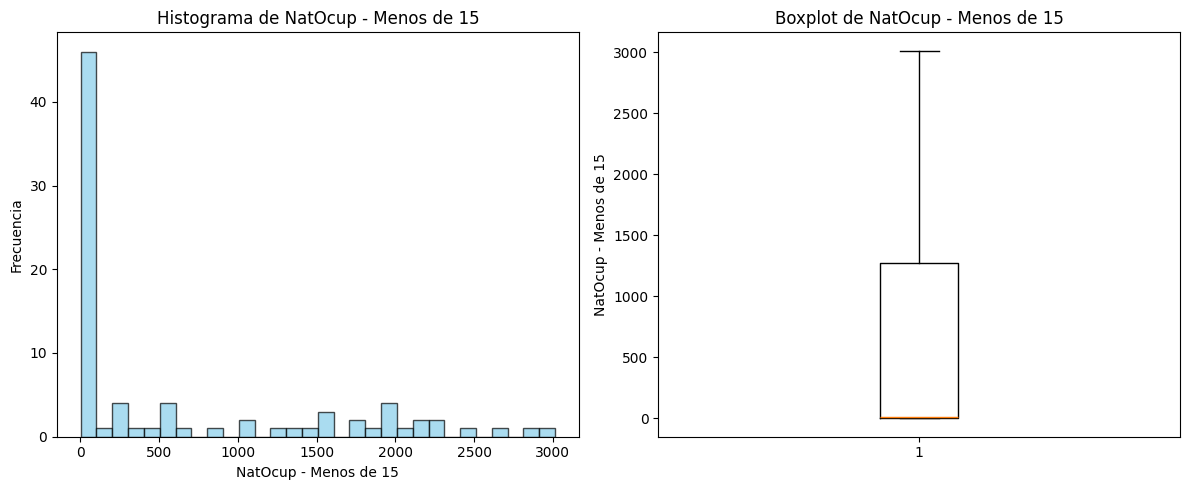

⚠️ La columna '15 - 19' tiene 22 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.41047044523079317946
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 15 - 19' NO provienen de una distribución normal.



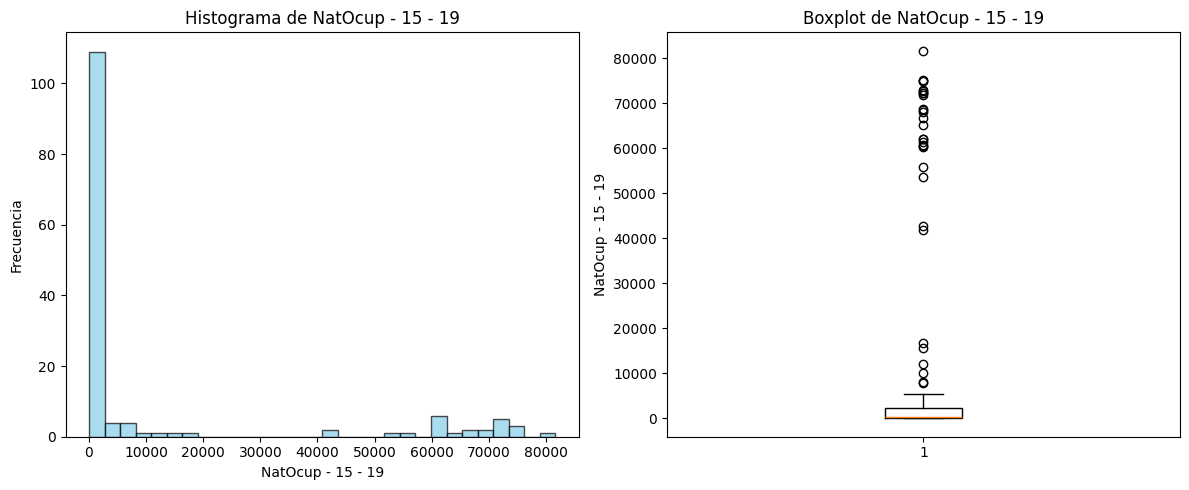

⚠️ La columna '20 - 24' tiene 3 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.48078273486943523540
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 20 - 24' NO provienen de una distribución normal.



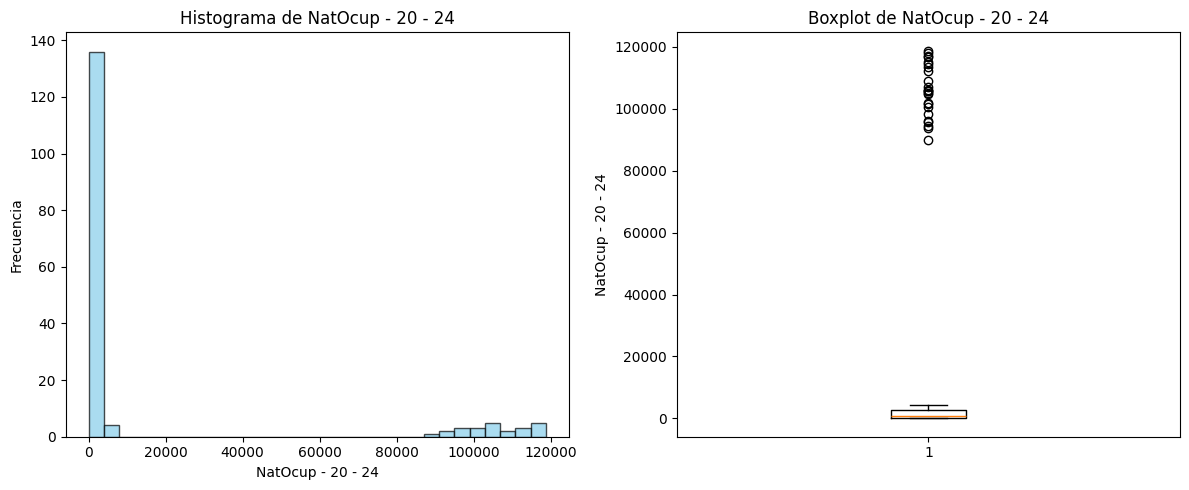

⚠️ La columna '25 - 29' tiene 2 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.43966915840444975583
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 25 - 29' NO provienen de una distribución normal.



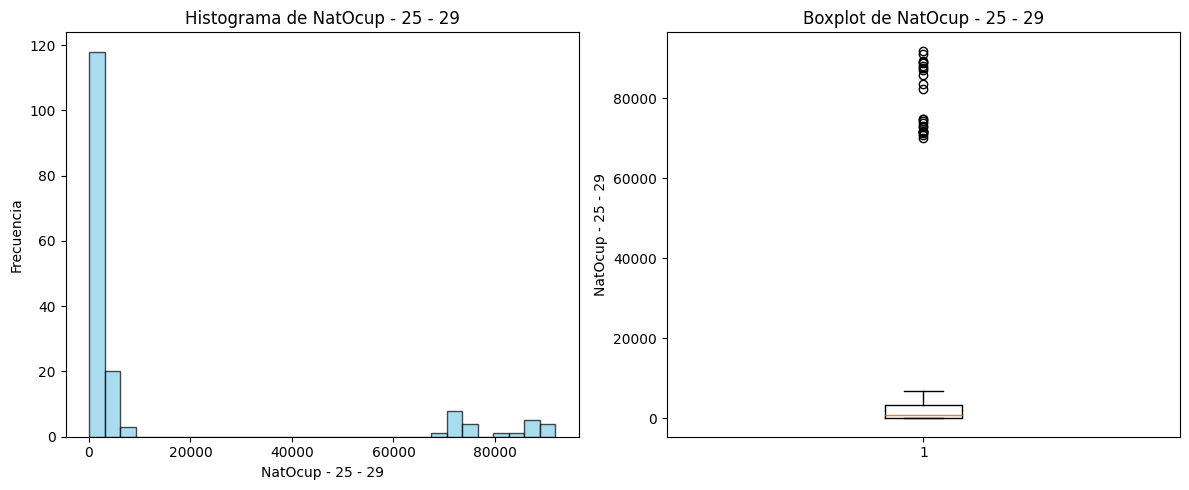

⚠️ La columna '30 - 34' tiene 5 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.42651382971566120794
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 30 - 34' NO provienen de una distribución normal.



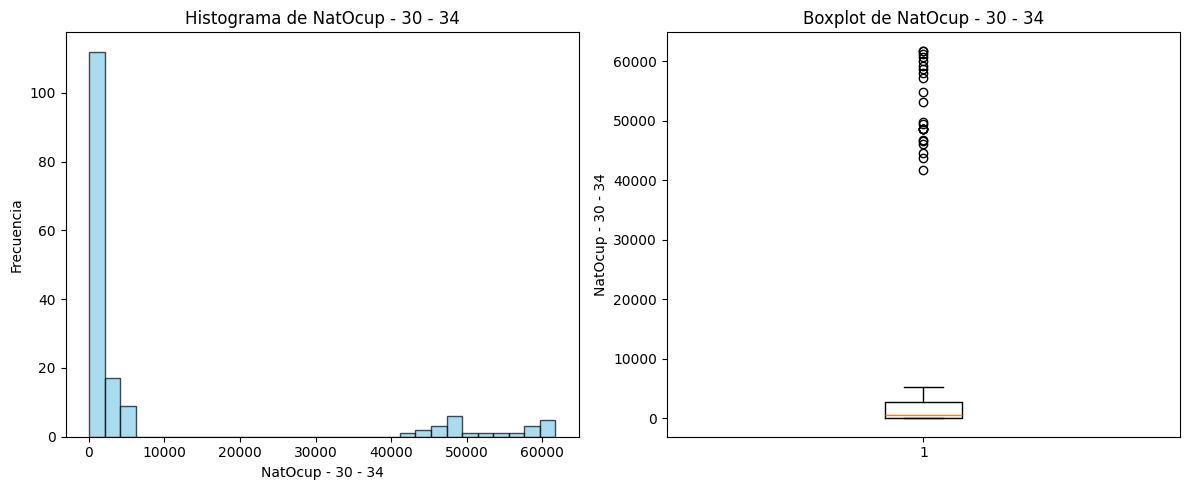

⚠️ La columna '35 - 39' tiene 6 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.43395628527000063013
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 35 - 39' NO provienen de una distribución normal.



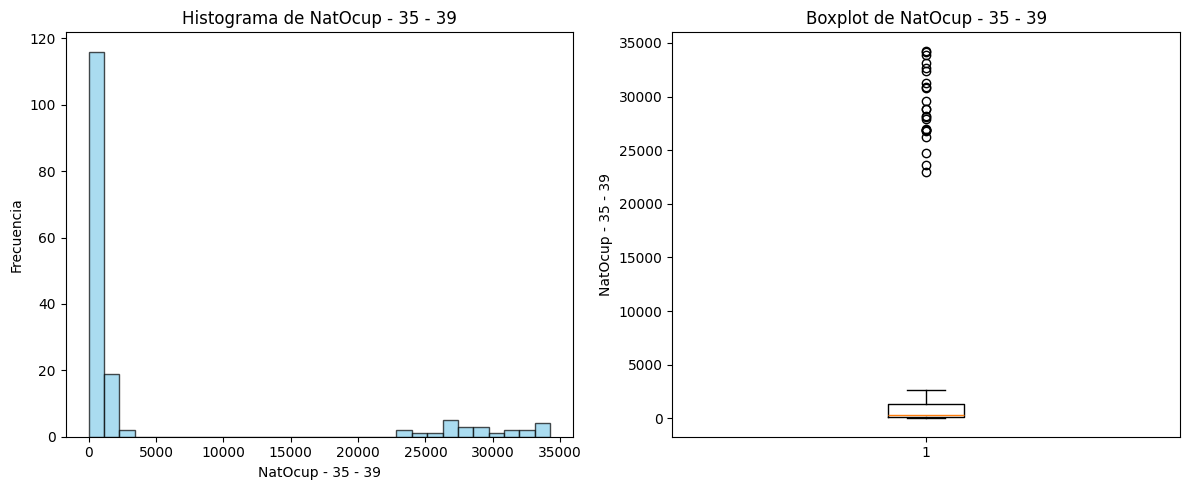

⚠️ La columna '40 - 44' tiene 13 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.46610599949068670655
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 40 - 44' NO provienen de una distribución normal.



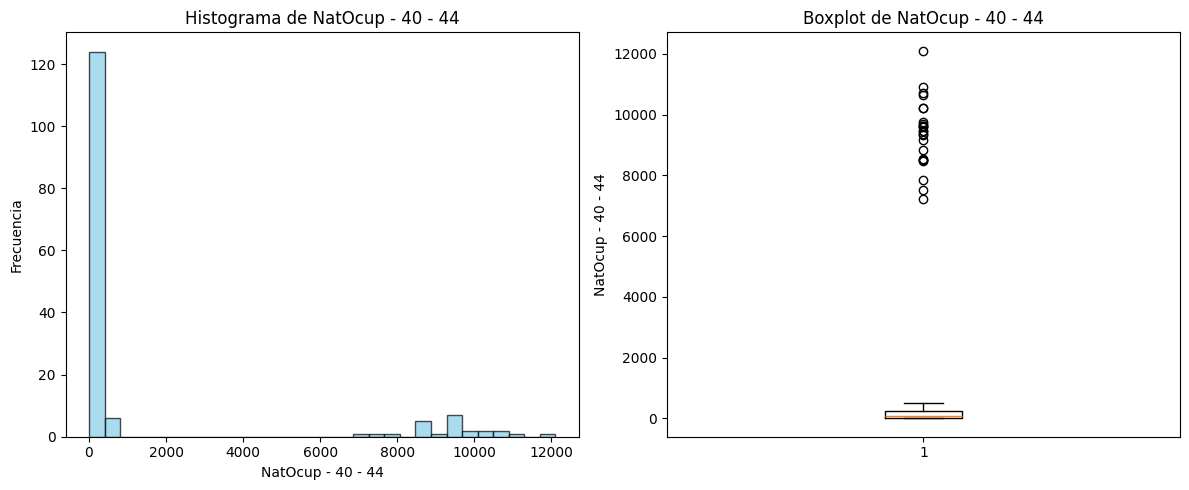

⚠️ La columna '45 - 49' tiene 30 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.46741760192100190174
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 45 - 49' NO provienen de una distribución normal.



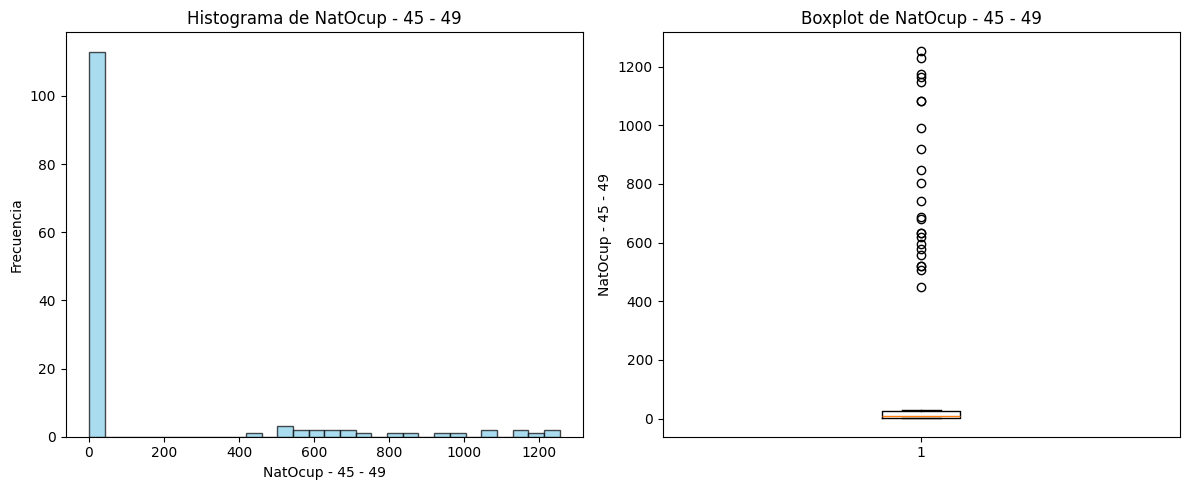

⚠️ La columna '50 y más' tiene 77 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.34601616957837788568
p-value = 0.00000000039461374314
Se rechaza la hipótesis nula: los datos de 'NatOcup - 50 y más' NO provienen de una distribución normal.



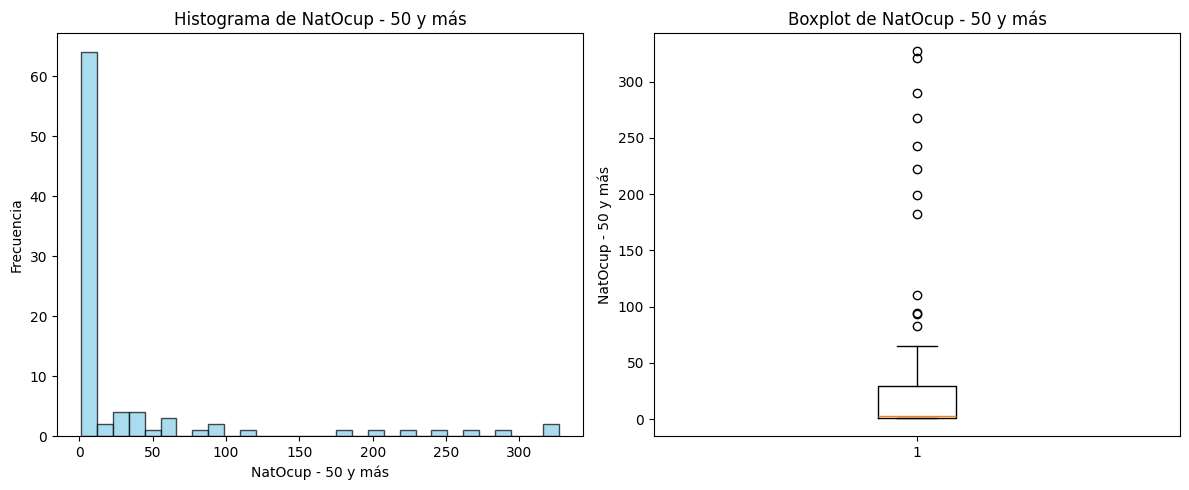

⚠️ La columna 'Ignorado' tiene 86 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.47250154908809893772
p-value = 0.00000000000000004045
Se rechaza la hipótesis nula: los datos de 'NatOcup - Ignorado' NO provienen de una distribución normal.



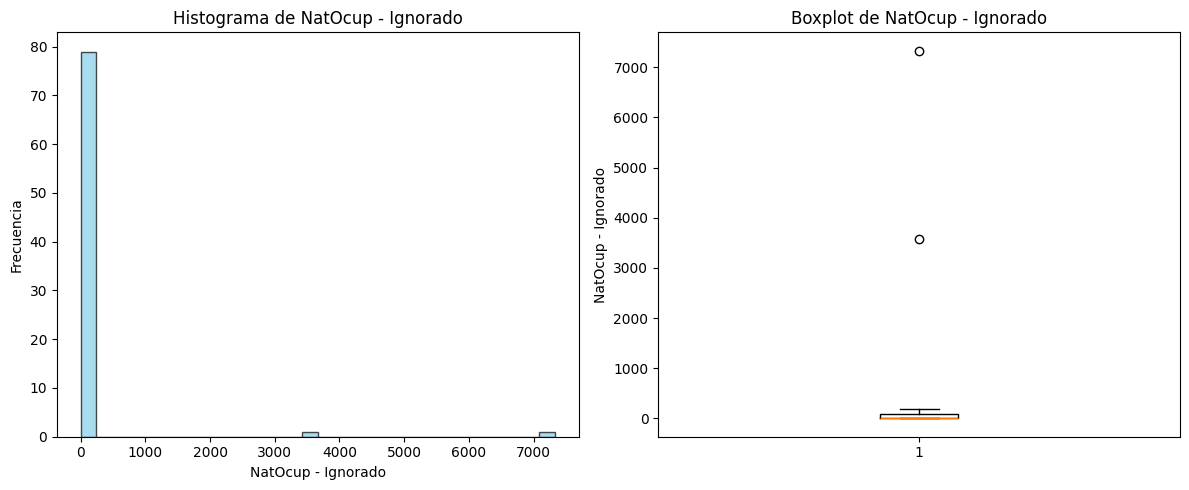

In [14]:
import normalidad

palabras_excluir = ["Todos", "Todas"]

for name, df in dfs.items():
    print("********************************************************************************************")
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cuantitiativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cuantitiativas.remove('Anio')
    
    # Filtrar filas que contengan "Todos" o "Todas" en cualquier columna categórica
    df_filtrado = df[~df.select_dtypes(include=[object]).apply(lambda x: x.str.contains('|'.join(palabras_excluir), na=False)).any(axis=1)]
    
    for column in cuantitiativas:  # Solo columnas numéricas
        # Contar los ceros en la columna original
        num_zeros = (df_filtrado[column] == 0).sum()
        
        # Mostrar el número de ceros
        if num_zeros > 0:
            print(f"⚠️ La columna '{column}' tiene {num_zeros} ceros en el archivo '{name}'.")
        
        # Filtrar los ceros de la columna antes de la prueba
        df_filtrado_column = df_filtrado[column].loc[df_filtrado[column] != 0]
        
        # Realizar la prueba solo si hay datos disponibles después de filtrar los ceros
        if not df_filtrado_column.empty:
            normalidad.prueba_de_normalidad(df_filtrado_column, f"{name} - {column}")
        else:
            print(f"⚠️ No hay datos suficientes para realizar la prueba de normalidad en '{name} - {column}' después de eliminar ceros.\n")


#### Analisis por año

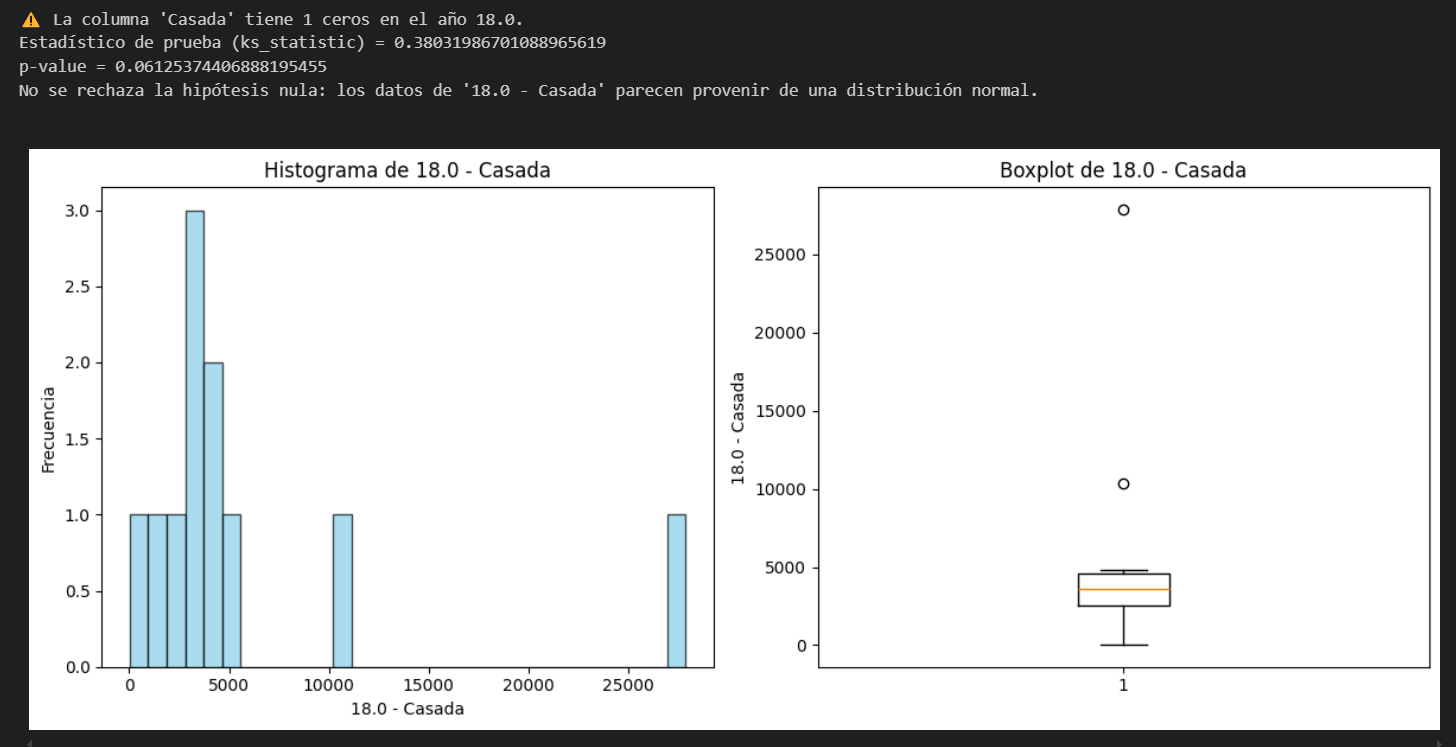

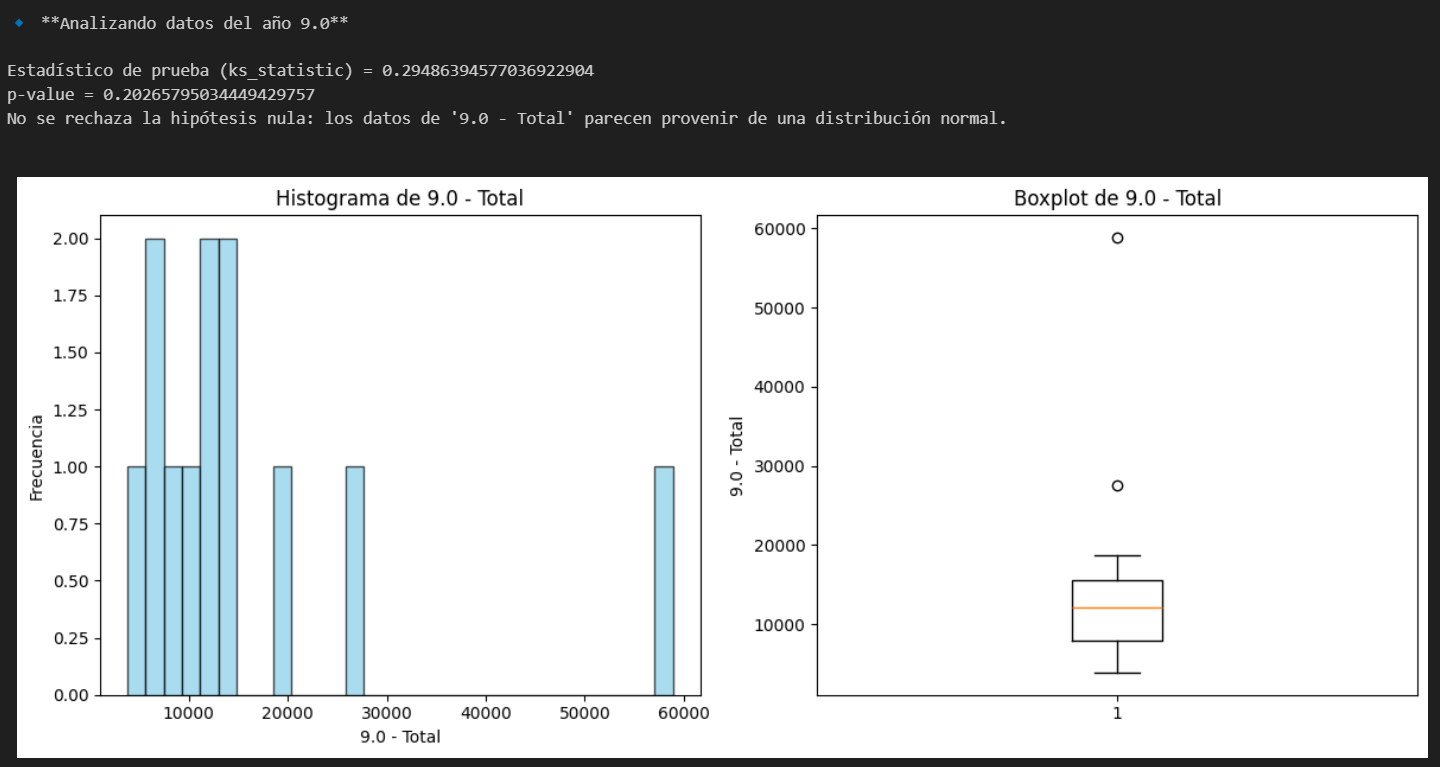


🔹 **Analizando archivo: NatDepEC**



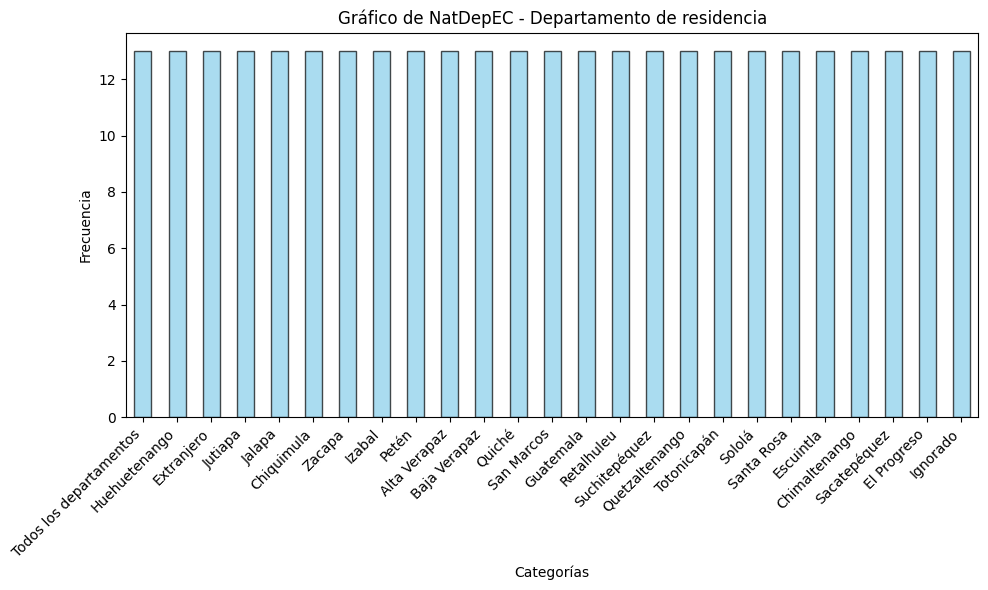

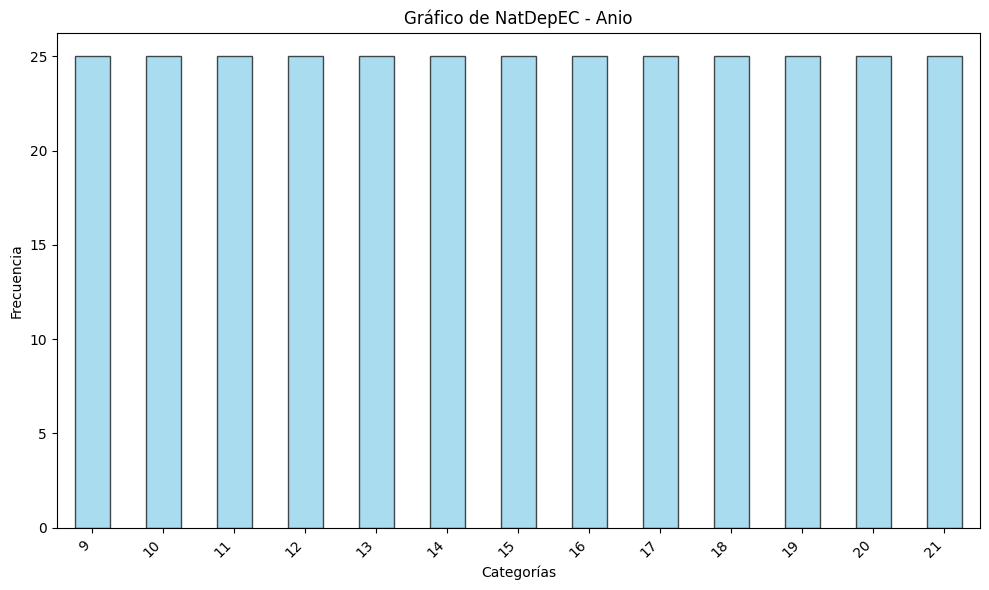


🔹 **Analizando archivo: NatDepMes**



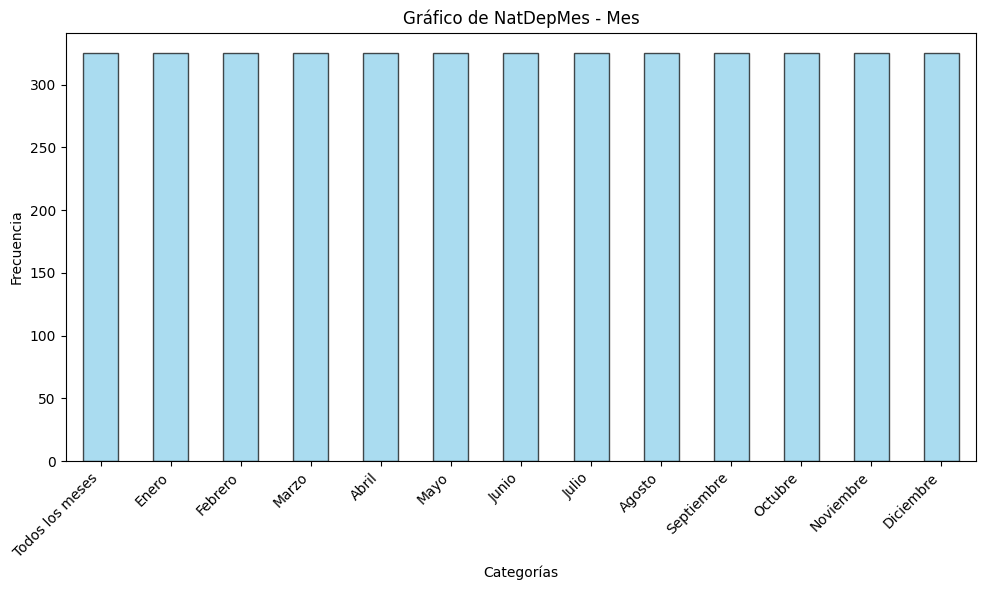

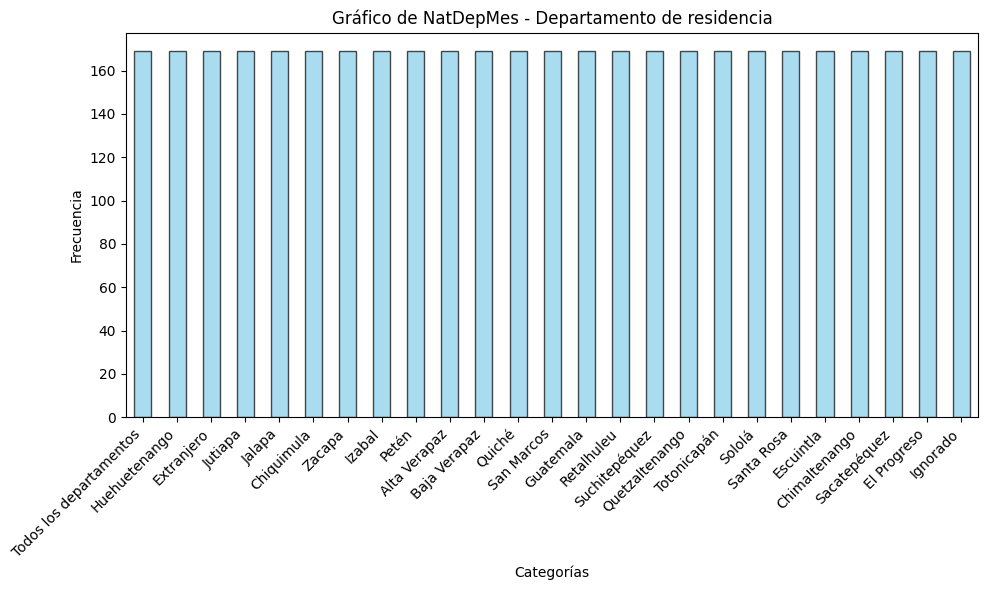

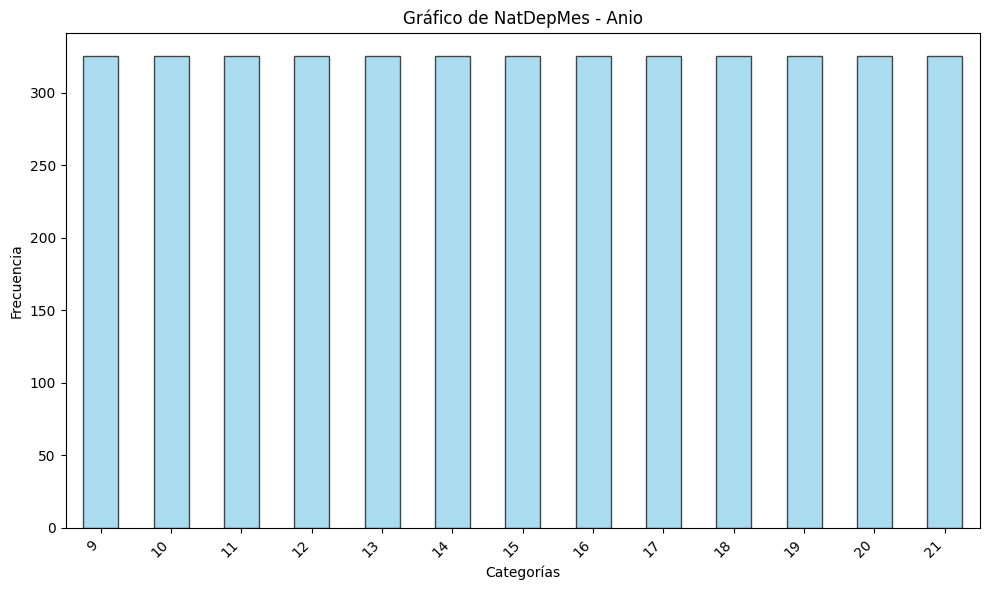


🔹 **Analizando archivo: NatEdad**



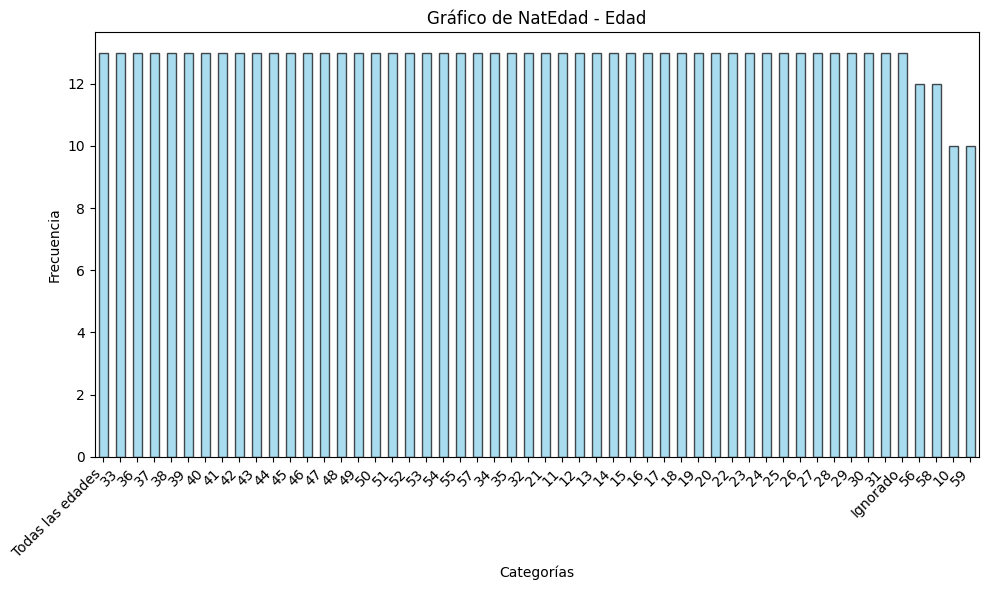

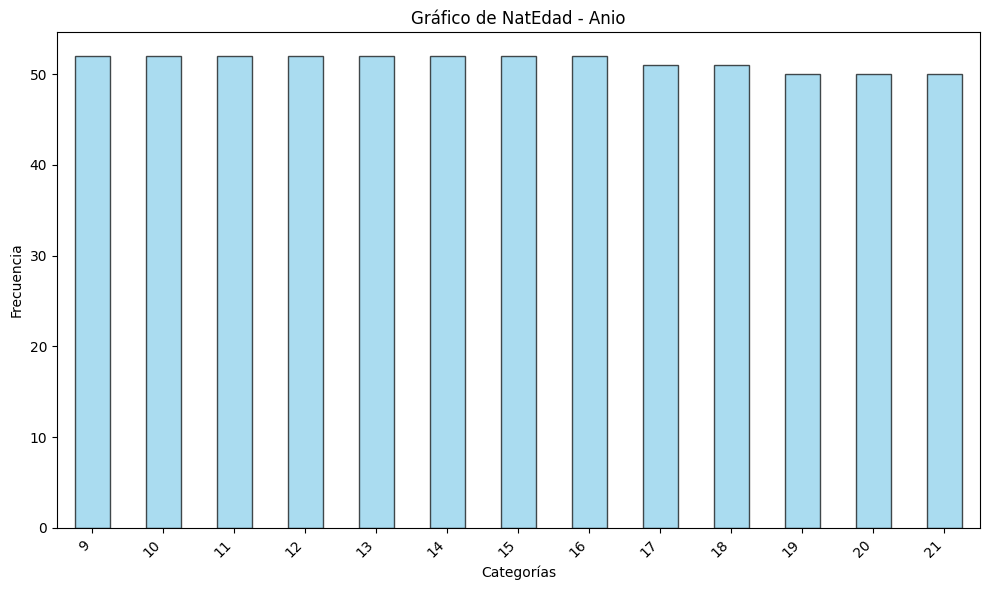


🔹 **Analizando archivo: NatEdadEC**



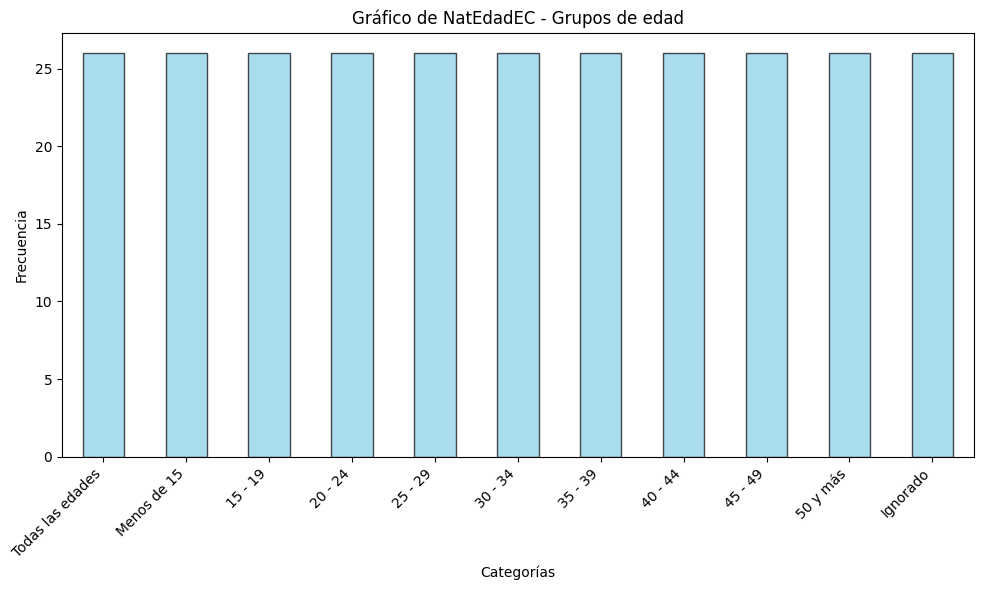

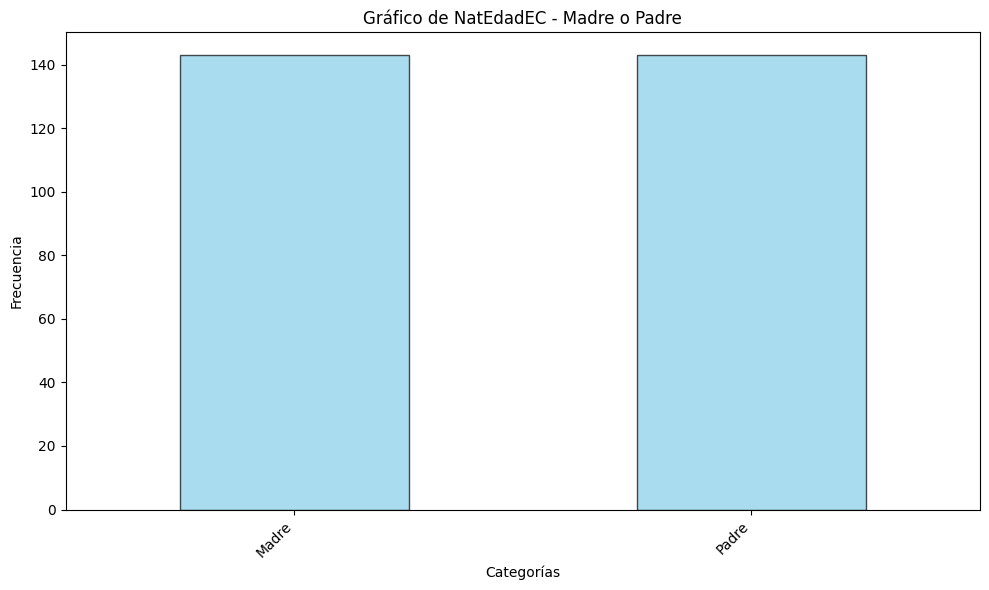

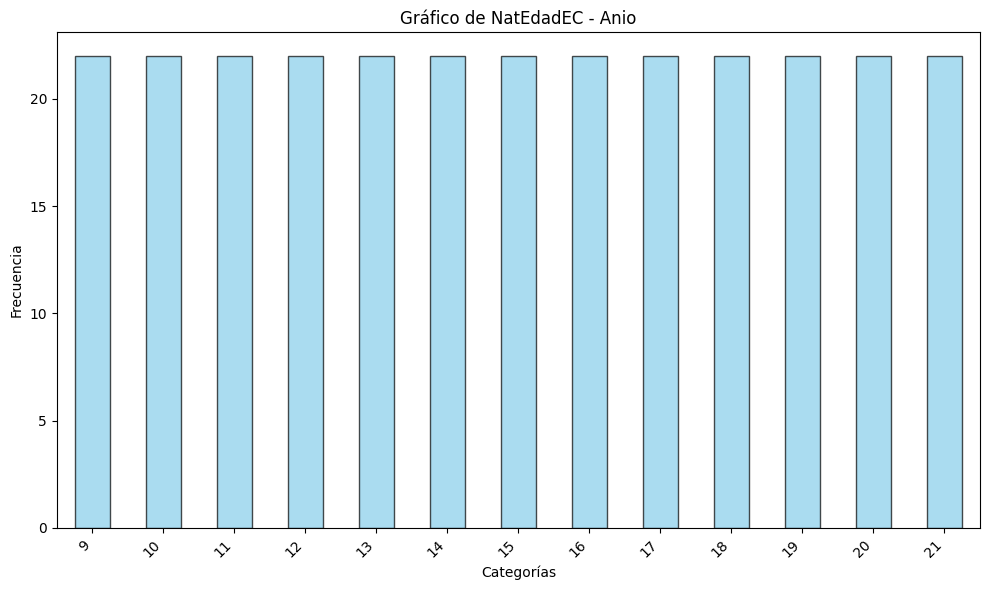


🔹 **Analizando archivo: NatEscolaridad**



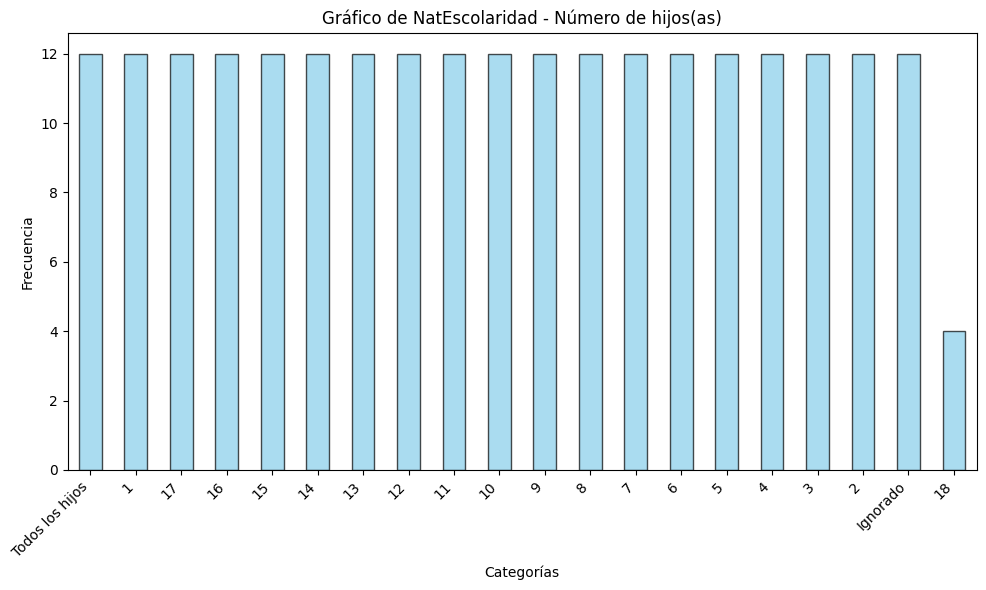

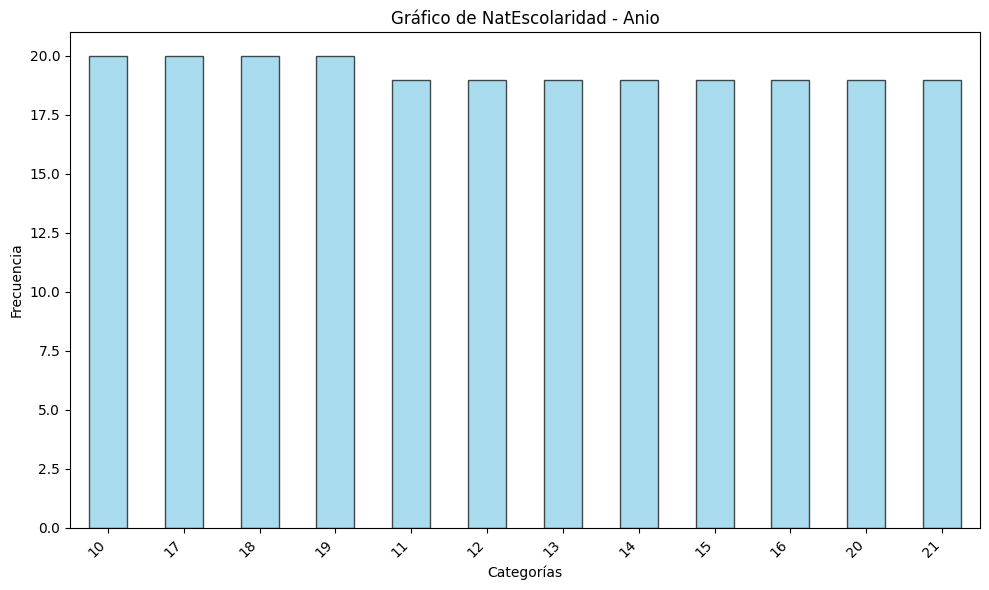


🔹 **Analizando archivo: NatEtniaArea**



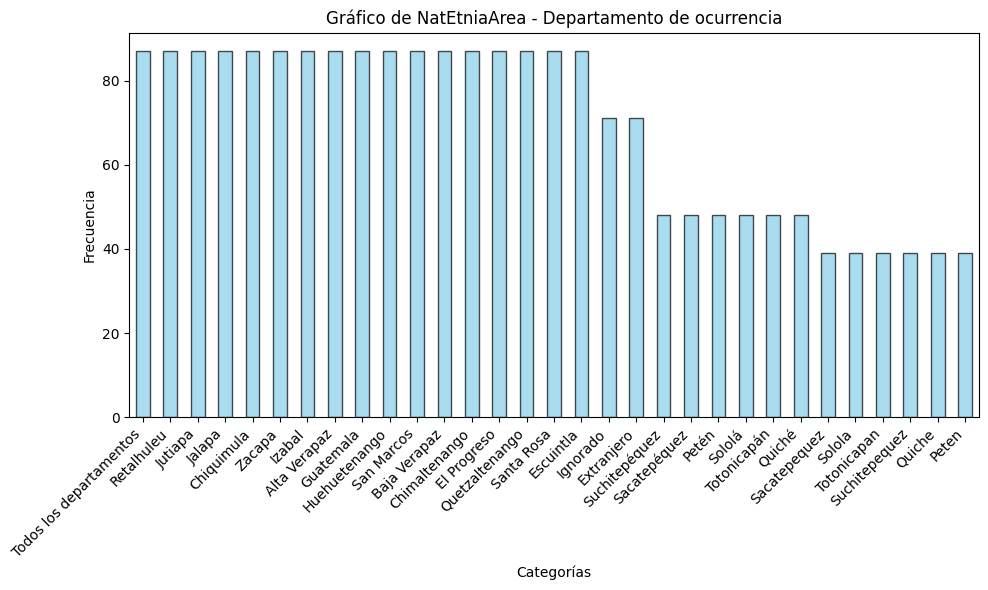

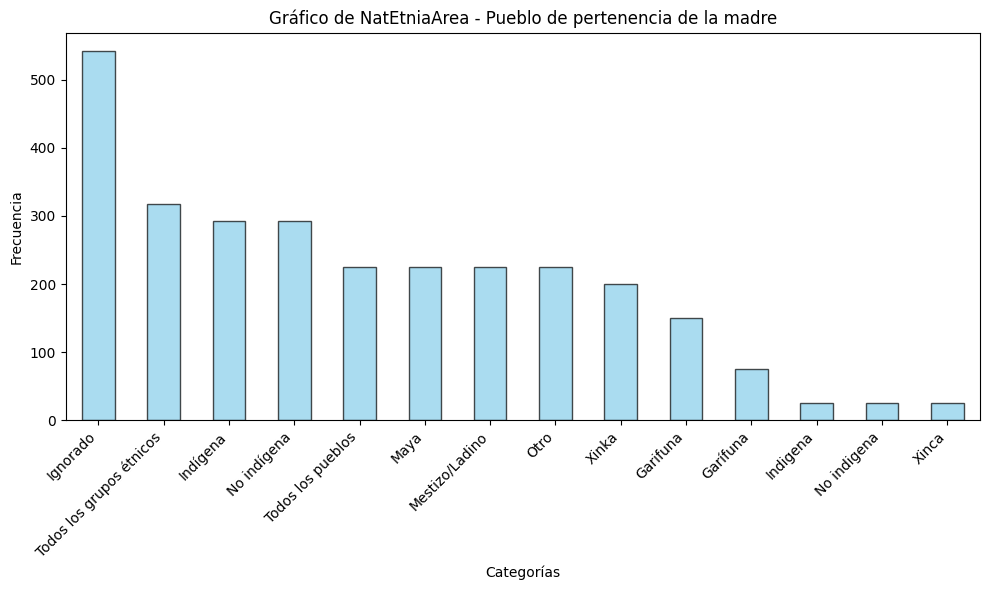

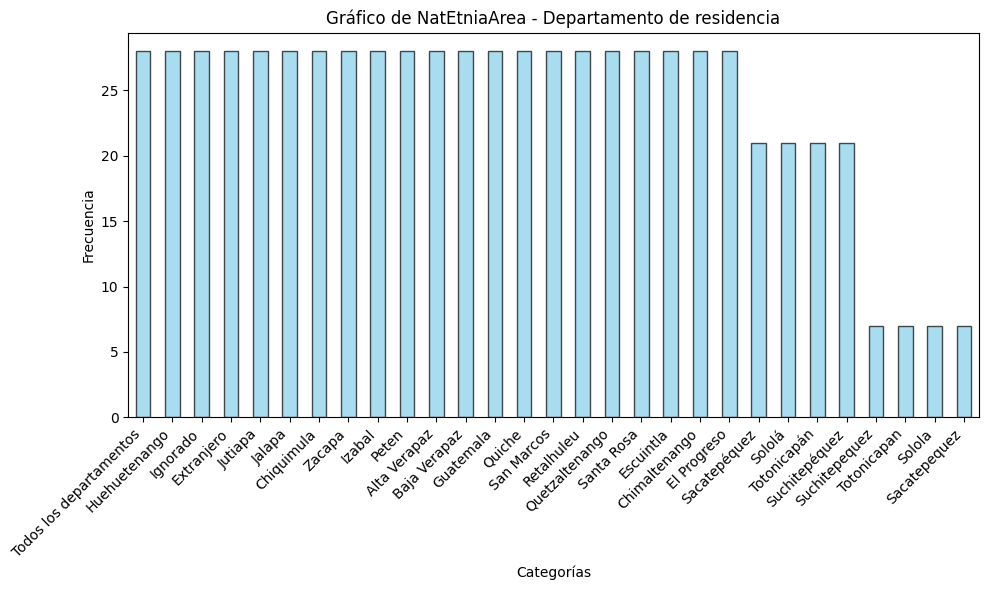

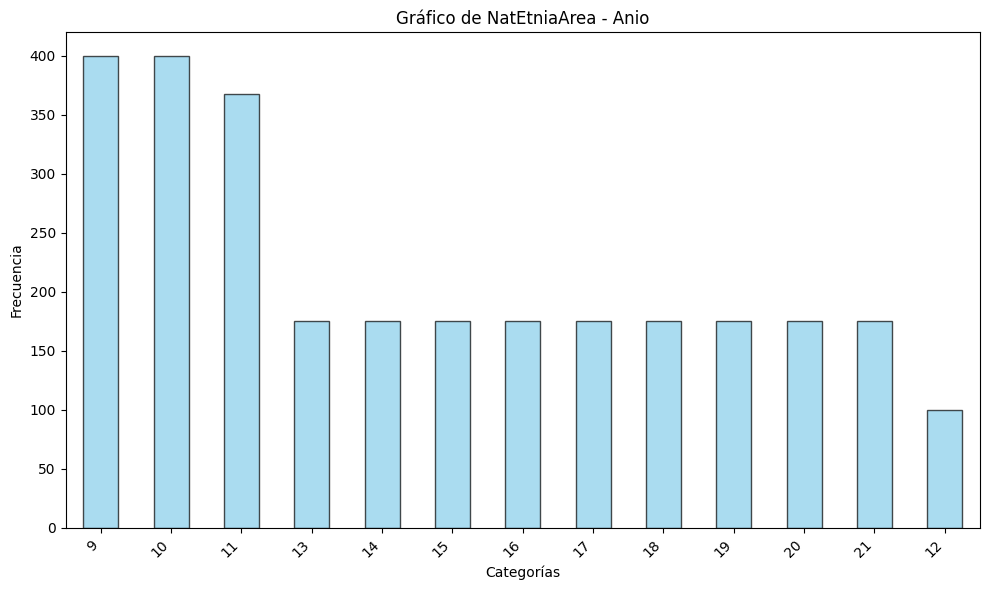


🔹 **Analizando archivo: NatNum**



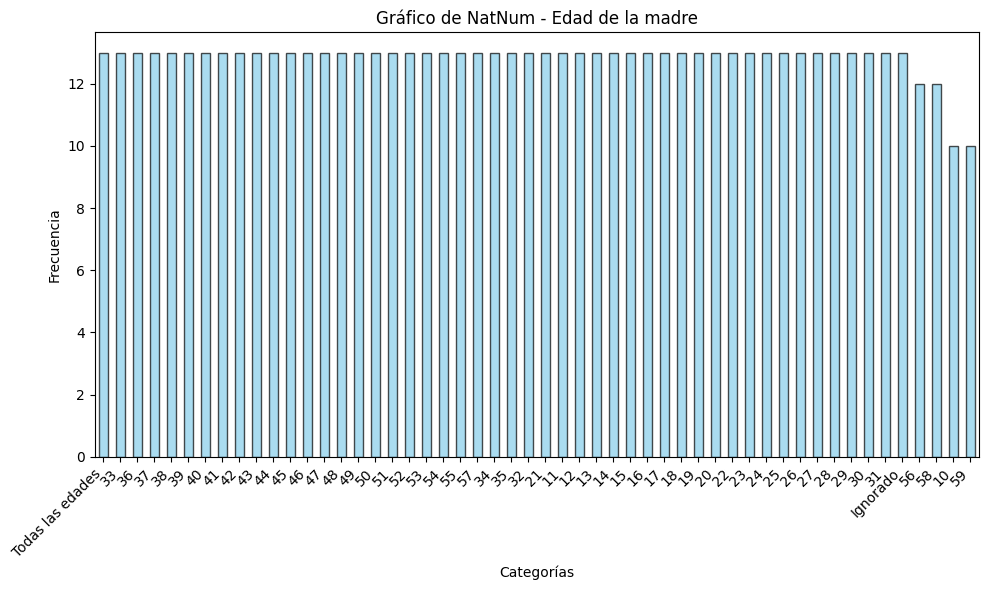

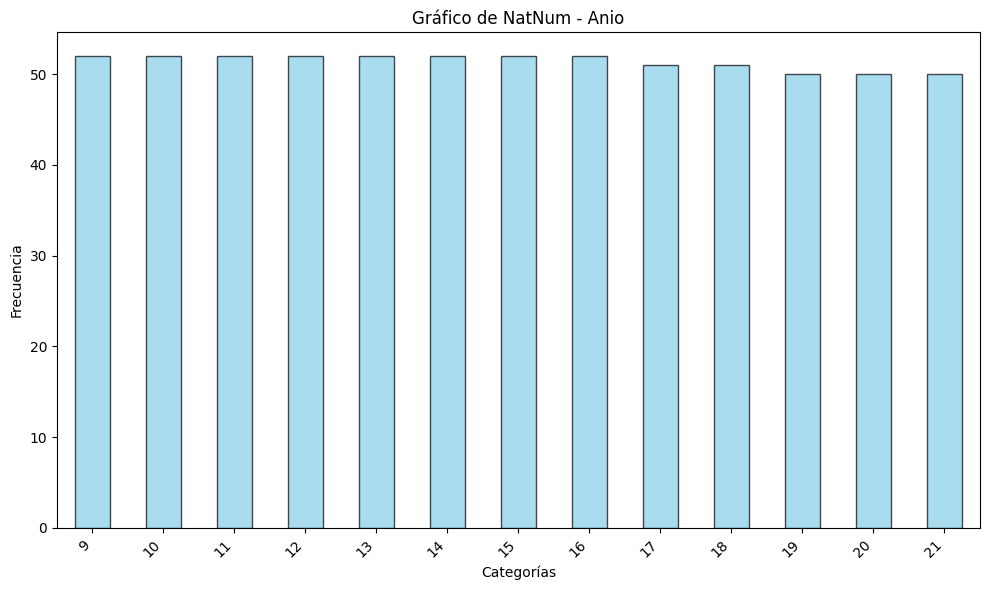


🔹 **Analizando archivo: NatOcup**



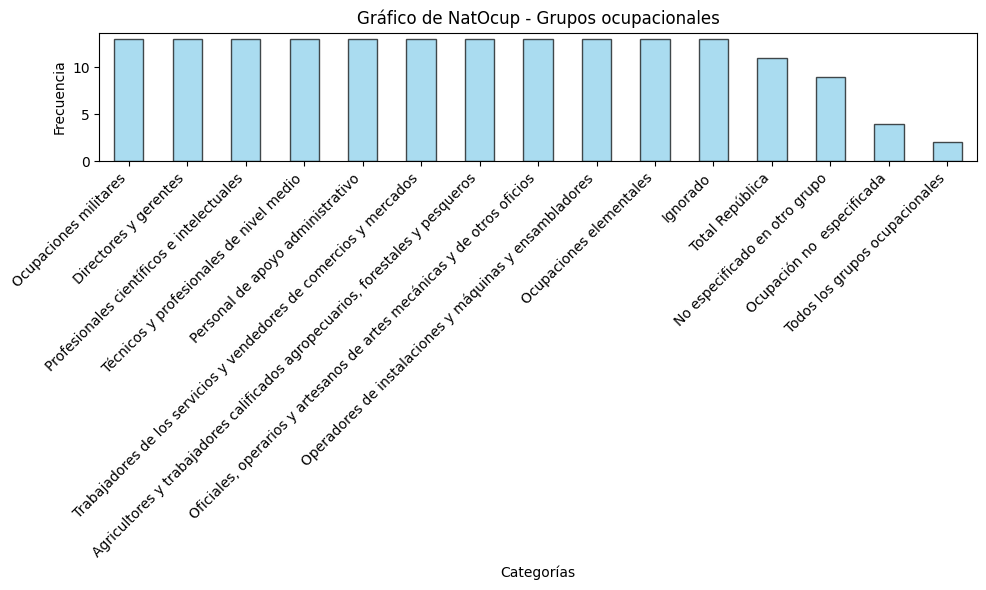

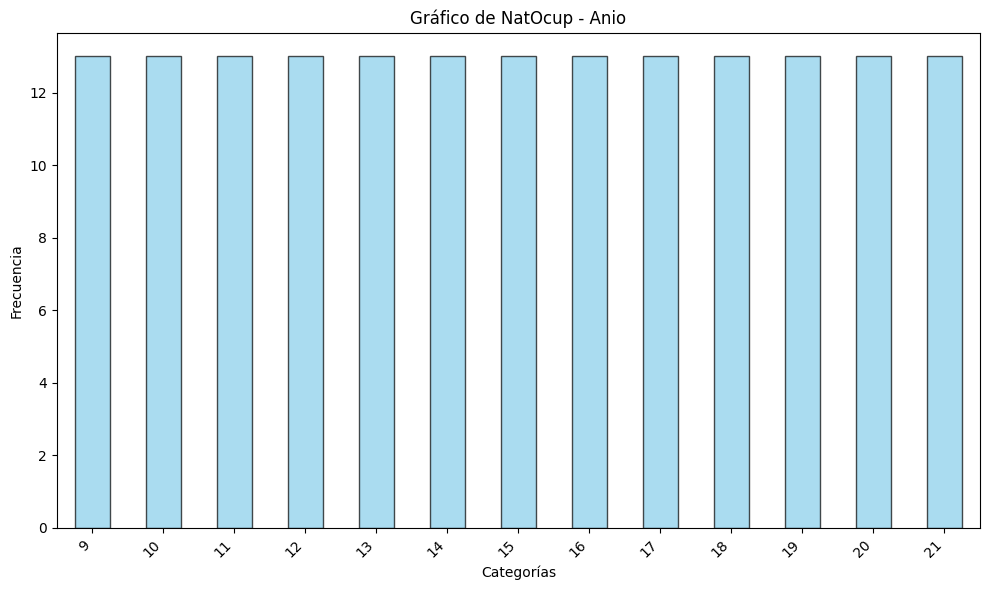

In [9]:
for name, df in dfs.items():
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cualitativas = df.select_dtypes(include=['object']).columns.tolist()
    cualitativas.append('Anio')
    
    for column in cualitativas:  # Solo columnas numéricas
        normalidad.frecuencias(df[column], f"{name} - {column}")

### Analisis Violencia Intrafamiliar